# 自治体データを分析する
## データの読み込み

In [1]:
# データファイルのあるフォルダを指定して
setwd("C:/Users/xxxxxxxx/Downloads")
# データ読み込み (header=T は、先頭行が項目名であることを示す)
d1 <- read.table("都道府県.txt", header=T)
d2 <- read.table("北海道支庁.txt", header=T)
d3 <- read.table("政令指定都市.txt", header=T)
d4 <- read.table("県庁所在地.txt", header=T)
d5 <- read.table("市町村.txt", header=T)
d6 <- read.table("政令指定都市内の区.txt", header=T)

## 面積順に都道府県を表示

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

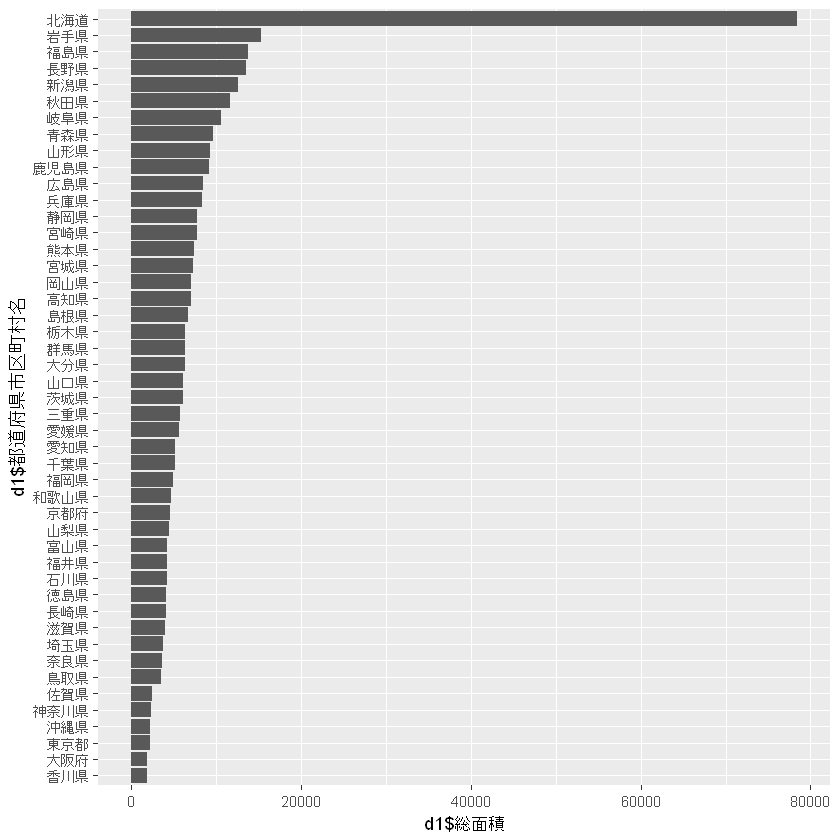

In [2]:
# ggplot2 パッケージを使用
library(ggplot2)
g <- ggplot(d1,aes(x = d1$"都道府県市区町村名",y= d1$"総面積"))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d1$"都道府県市区町村名",d1$"総面積")))
# 横倒し
g <- g + coord_flip()
plot(g)

# 北海道の旧支庁を加えてみる＆東京を島嶼部と本土に分ける

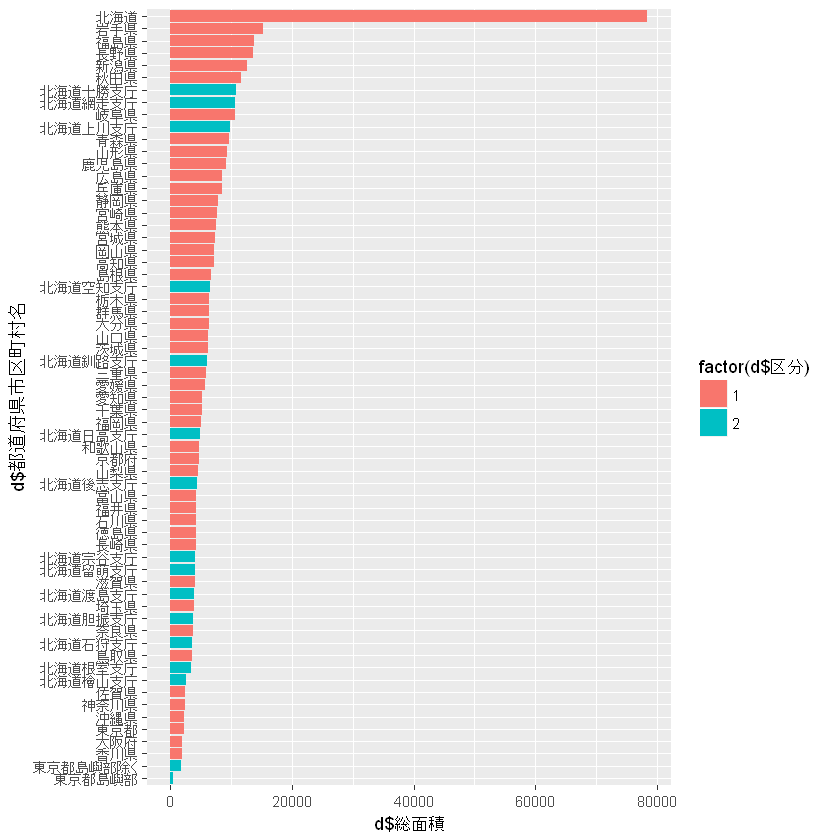

In [9]:
d22 <- read.table("東京支庁.txt", header=T)
d <- rbind(d1,d2,d22)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"総面積",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"総面積")))
g <- g + coord_flip()
plot(g)

北海道の支庁は、そこらの都府県並みの広さ。
また、香川県や大阪府より広いと思っていた東京都は、実は島嶼部を除くと香川県より小さい。

## 可住地面積を比較

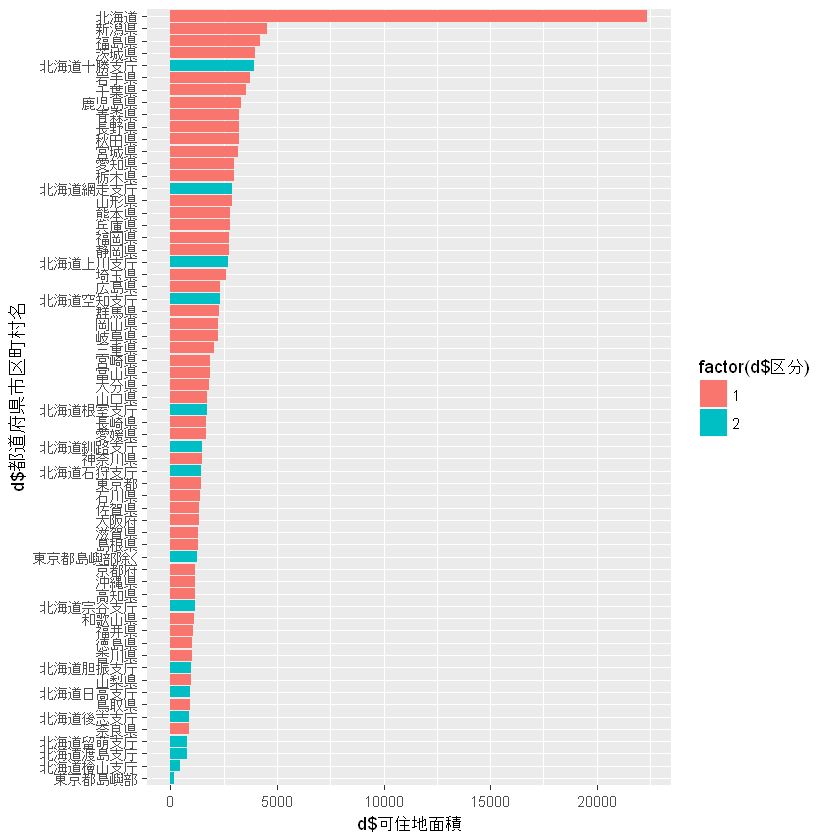

In [10]:
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"可住地面積",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"可住地面積")))
g <- g + coord_flip()
plot(g)

可住地面積で見ると、東京・大阪はそれほど狭くない

## 人口を比較

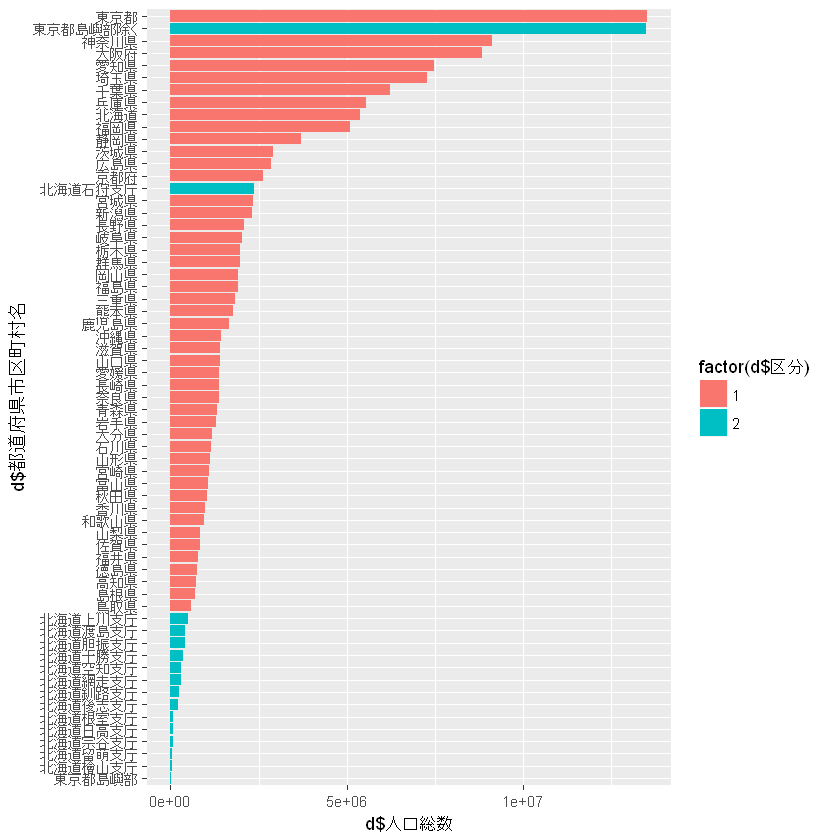

In [11]:
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"人口総数",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"人口総数")))
g <- g + coord_flip()
plot(g)

なぜ北海道の支庁を県にしないのかと思っていたが、人口規模が小さすぎて県としては成り立たないのかも。

## 政令指定都市を加えてみる

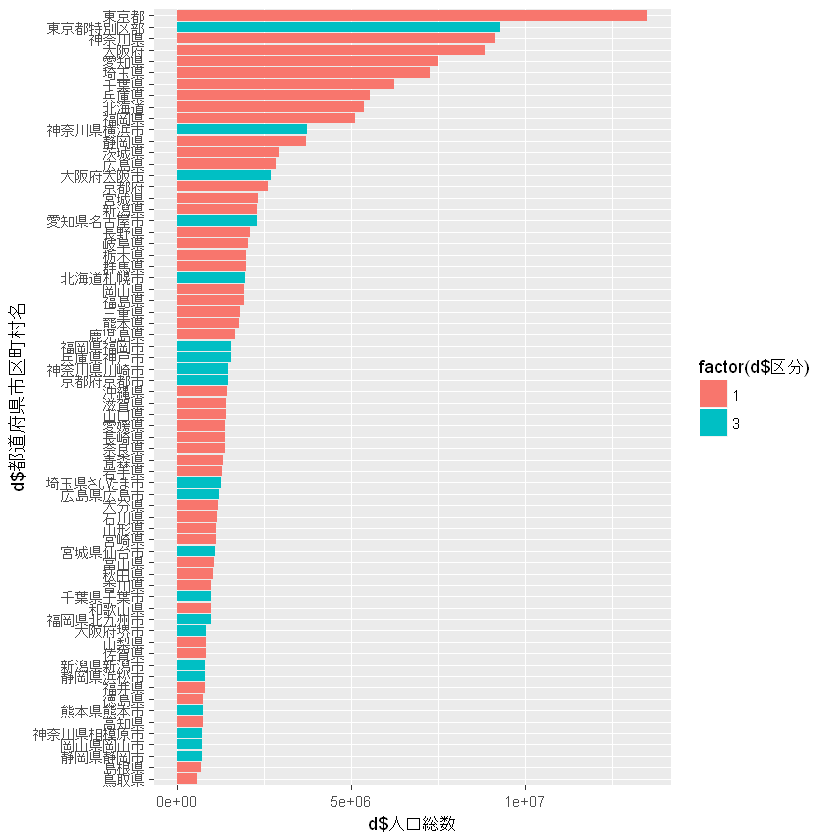

In [16]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"人口総数",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"人口総数")))
g <- g + coord_flip()
plot(g)

## 政令指定都市とそれ以外の県庁所在地を比較してみる

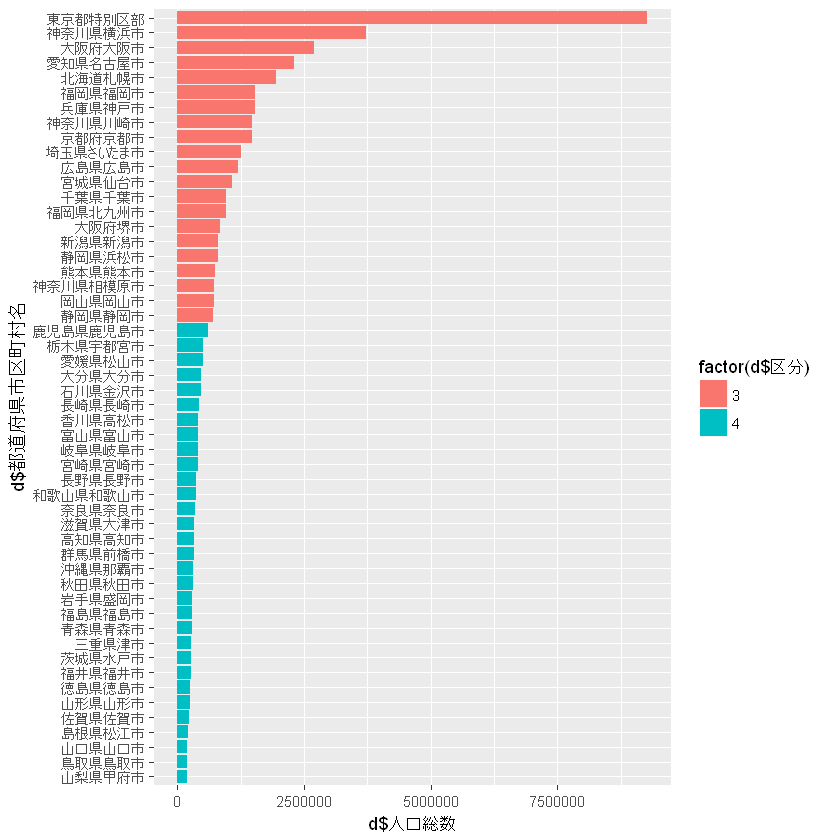

In [13]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"人口総数",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"人口総数")))
g <- g + coord_flip()
plot(g)

かつては政令指定都市の基準は人口100万人だったと思うが、今は静岡と鹿児島の間で線引きされてるのか...

## 都道府県と政令都市の昼間人口を比較する

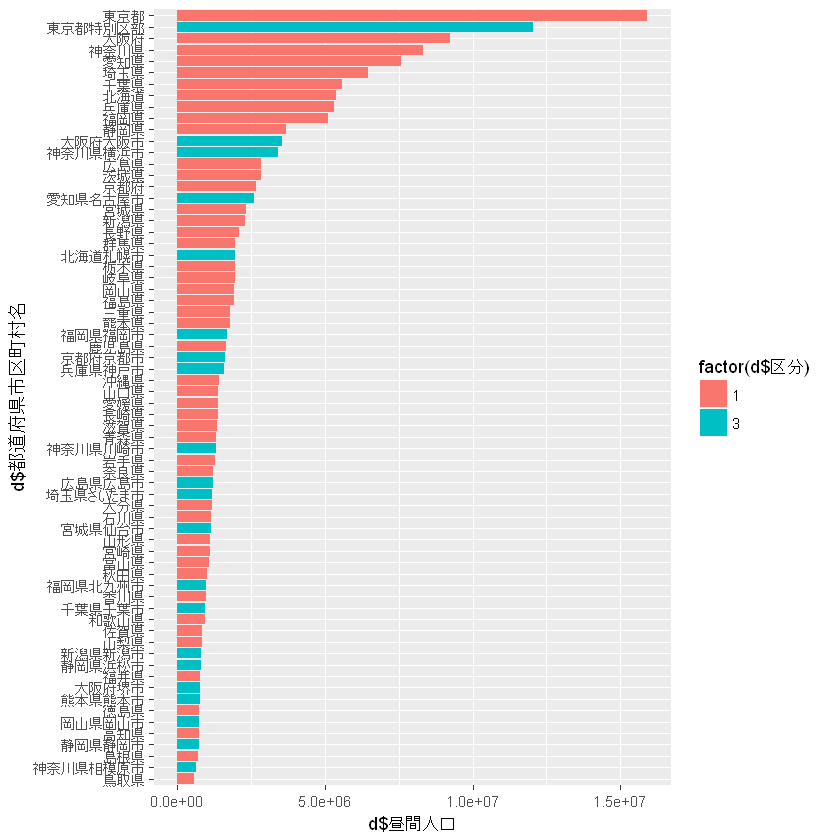

In [17]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"昼間人口",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"昼間人口")))
g <- g + coord_flip()
plot(g)

昼間人口でみると、大阪・神奈川、大阪・横浜が逆転している

## 政令指定都市とそれ以外の県庁所在地の昼間人口を比較する

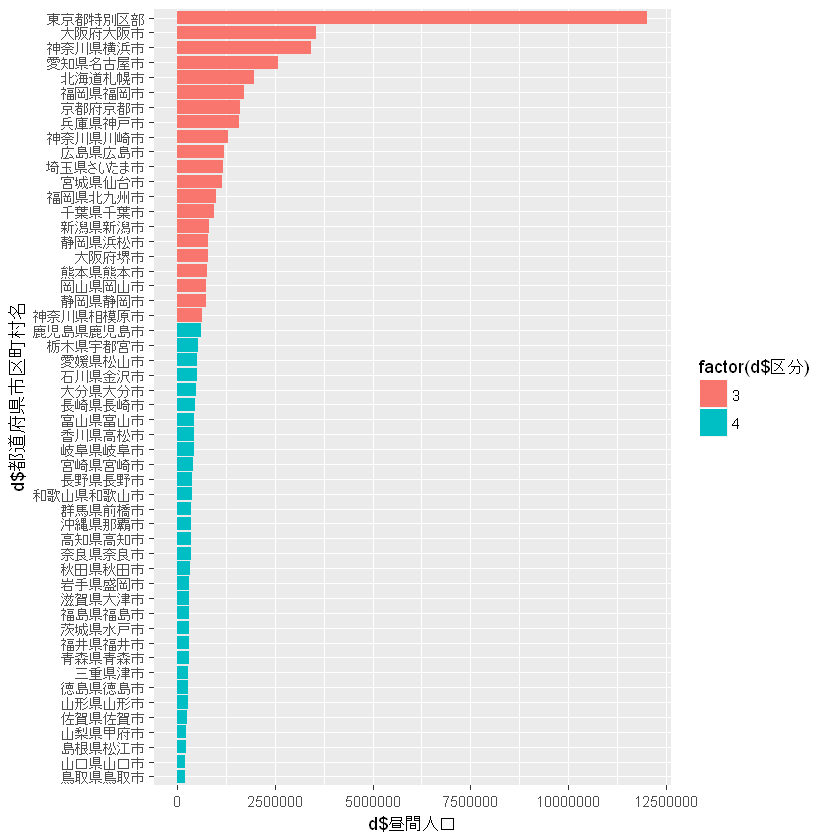

In [15]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= d$"昼間人口",fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名",d$"昼間人口")))
g <- g + coord_flip()
plot(g)

## 都道府県と政令都市の「昼間人口÷夜間人口」を比較する

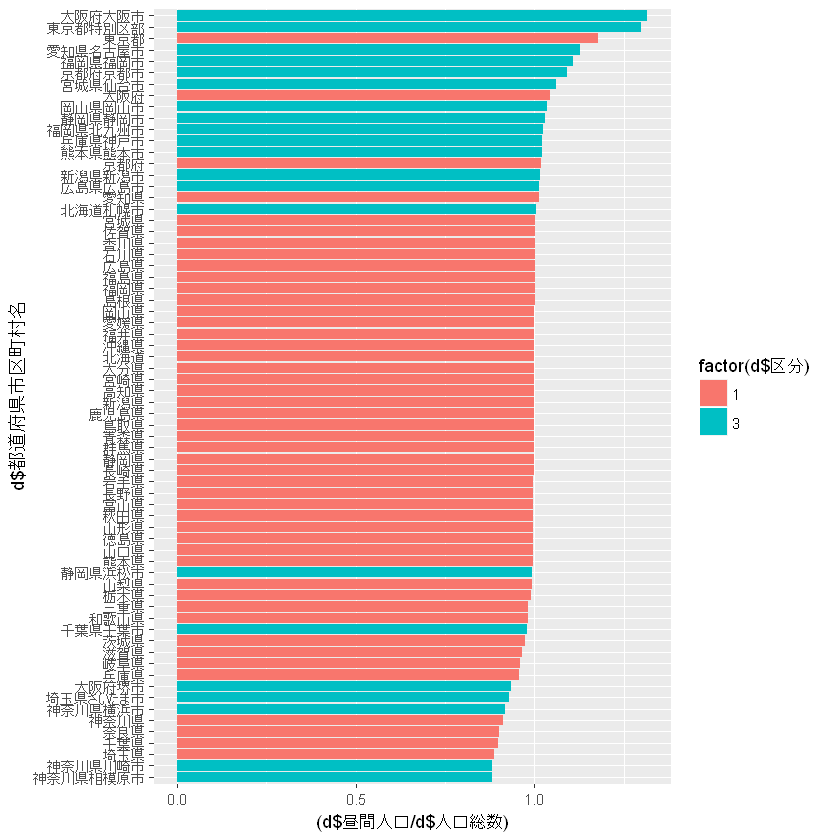

In [18]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"昼間人口" / d$"人口総数") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"昼間人口" / d$"人口総数"))))
g <- g + coord_flip()
plot(g)

政令指定都市と言えど、比率が 1.0 を下回る、隣接する中核都市の周縁地域でしかないようなところも。

## 政令指定都市とそれ以外の県庁所在地の「昼間人口÷夜間人口」を比較する

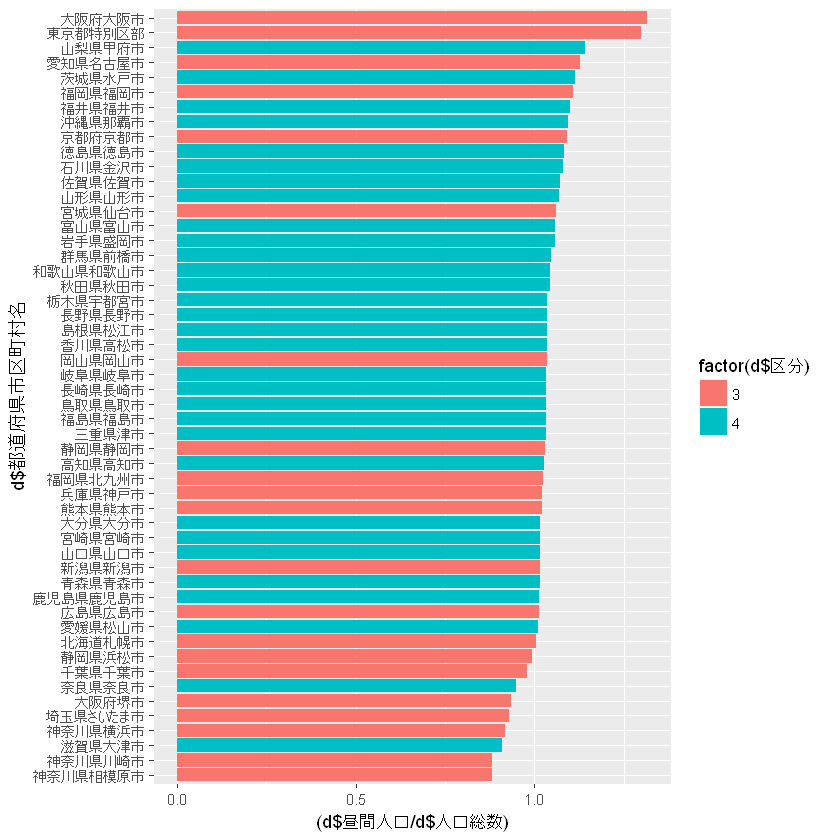

In [19]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"昼間人口" / d$"人口総数") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"昼間人口" / d$"人口総数"))))
g <- g + coord_flip()
plot(g)

県庁所在地なのに、比率が 1.0 を下回る、隣接する中核都市の周縁地域でしかないようなところも。

## 都道府県と政令都市の製造品出荷額を比較する

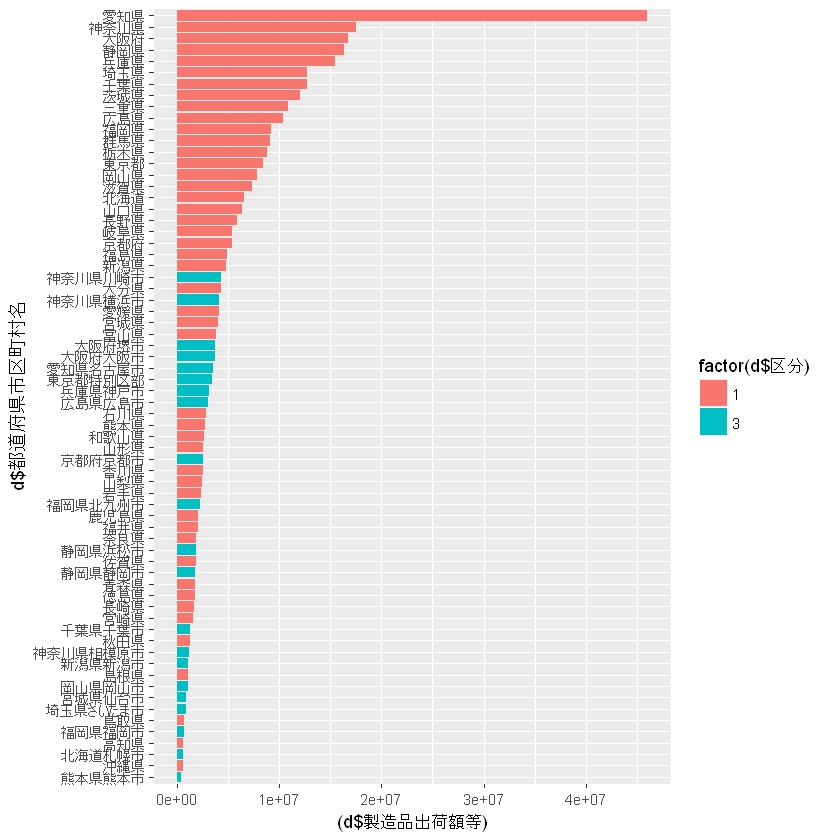

In [20]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"製造品出荷額等") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"製造品出荷額等"))))
g <- g + coord_flip()
plot(g)

さすが、トヨタのお膝元 愛知県。

## 政令指定都市とそれ以外の県庁所在地のの製造品出荷額を比較する

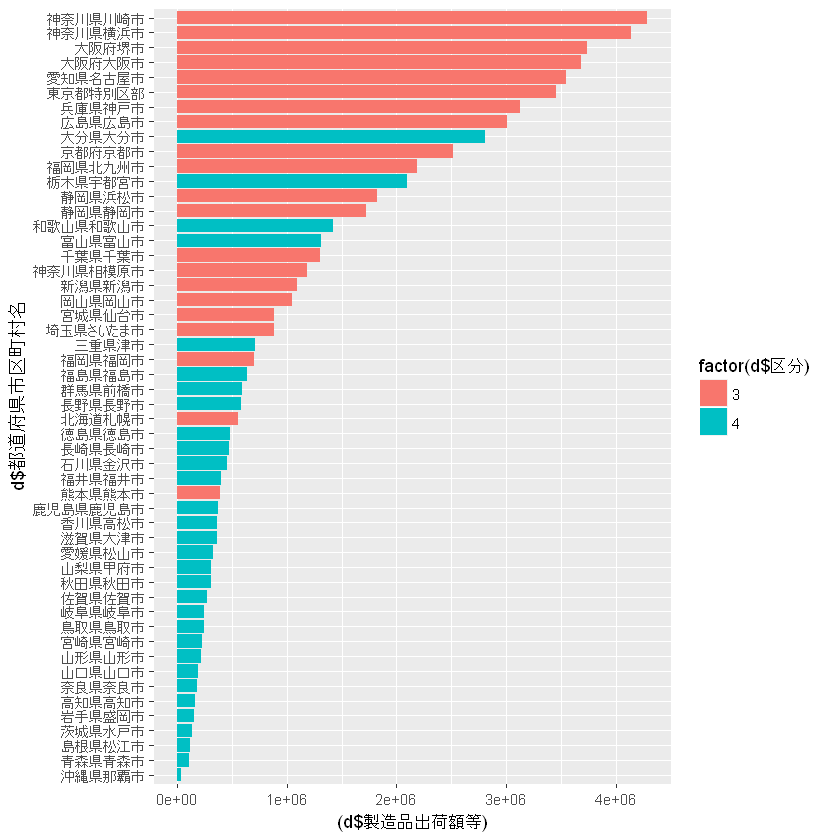

In [23]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"製造品出荷額等") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"製造品出荷額等"))))
g <- g + coord_flip()
plot(g)

大分、宇都宮って何かあるんですか。

## 都道府県と政令都市の「製造品出荷額÷昼間人口」を比較する

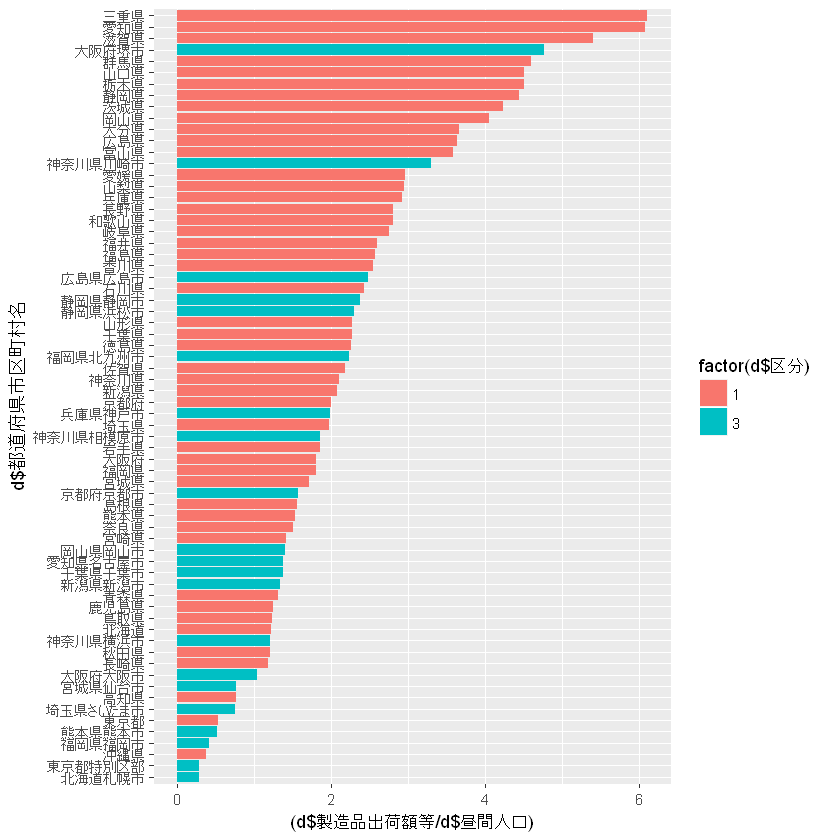

In [22]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"製造品出荷額等" / d$"昼間人口") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"製造品出荷額等" / d$"昼間人口"))))
g <- g + coord_flip()
plot(g)

三重県、滋賀県の強さは何？

## 政令指定都市とそれ以外の県庁所在地の「製造品出荷額÷昼間人口」を比較する

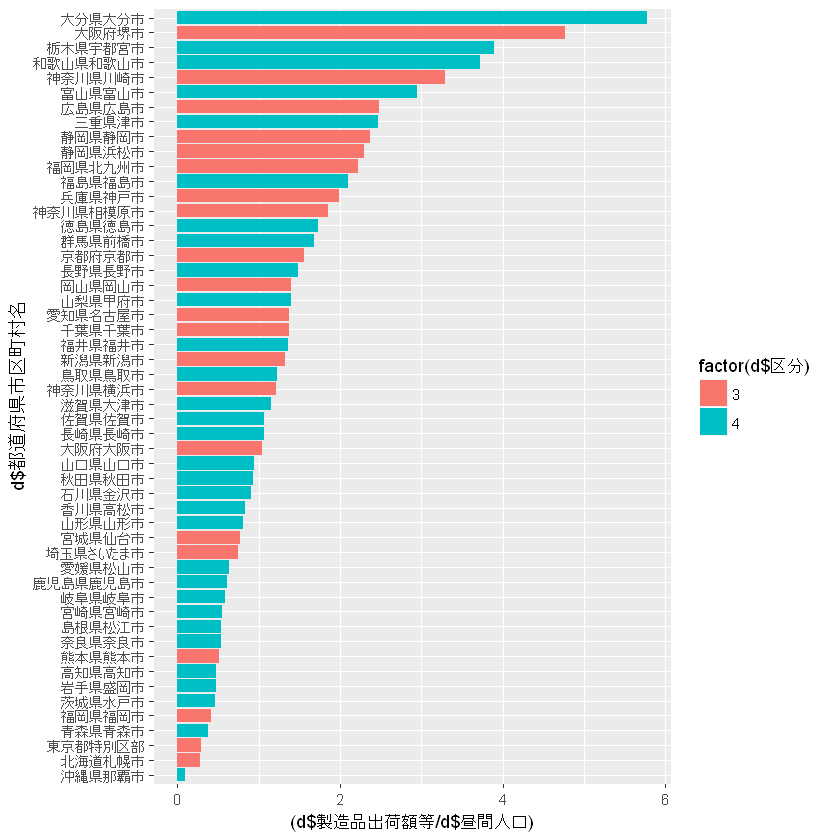

In [24]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"製造品出荷額等" / d$"昼間人口") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"製造品出荷額等" / d$"昼間人口"))))
g <- g + coord_flip()
plot(g)

大分、堺、宇都宮。こういうのって何の資料を見ればわかるんでしょうか。

## 都道府県と政令都市の商品販売額を比較する

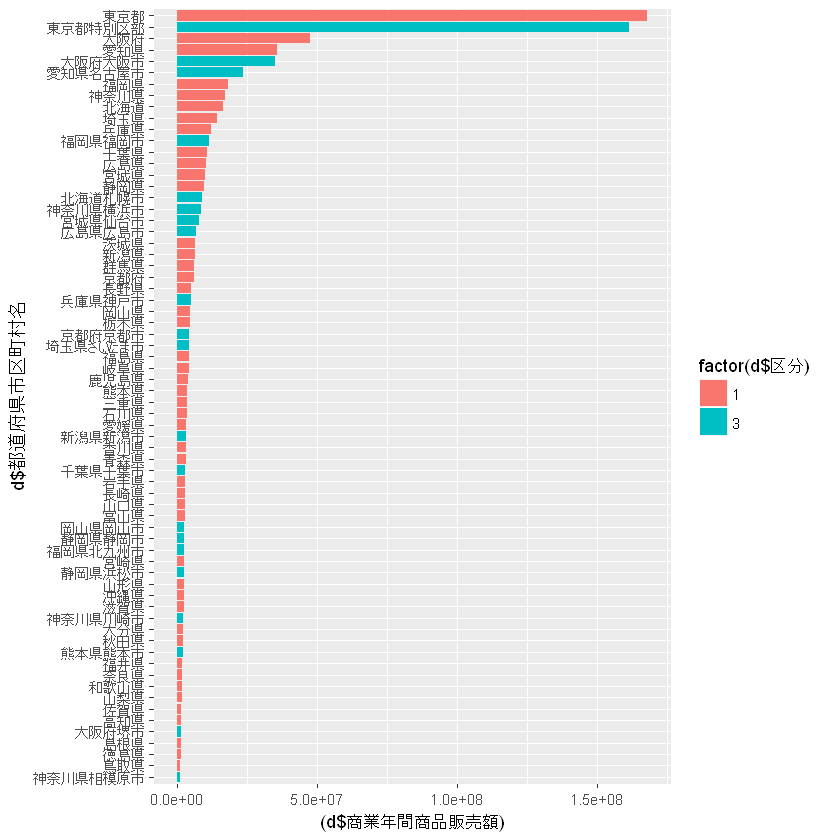

In [25]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"商業年間商品販売額") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"商業年間商品販売額"))))
g <- g + coord_flip()
plot(g)

神奈川県、随分ランク下がってますね。

## 政令指定都市とそれ以外の県庁所在地の商品販売額を比較する

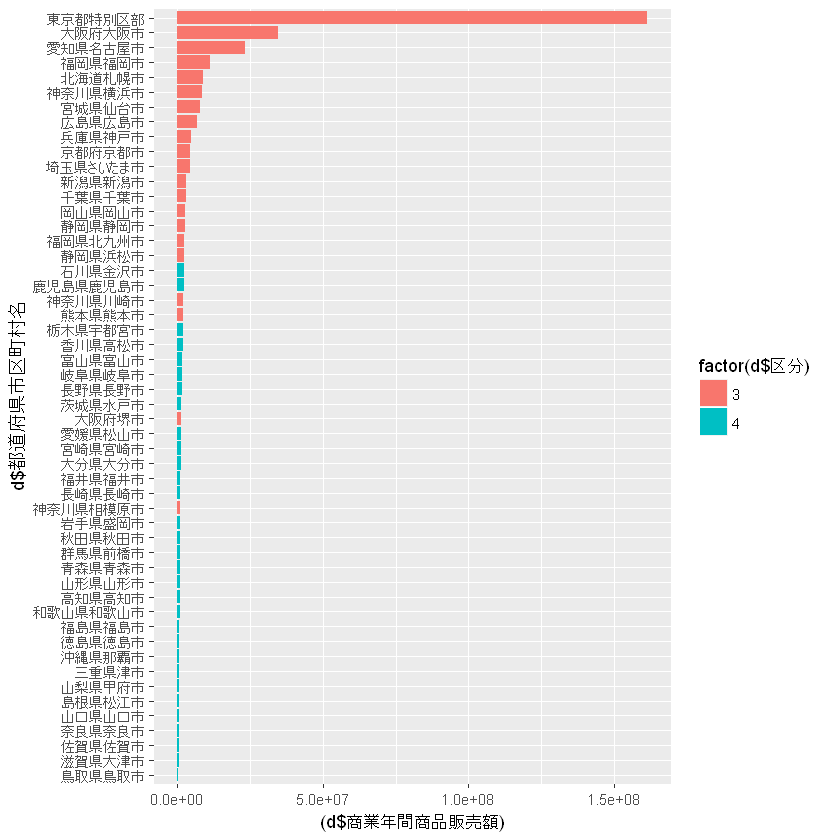

In [26]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"商業年間商品販売額") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"商業年間商品販売額"))))
g <- g + coord_flip()
plot(g)

## 都道府県と政令都市の「商品販売額÷昼間人口」を比較する

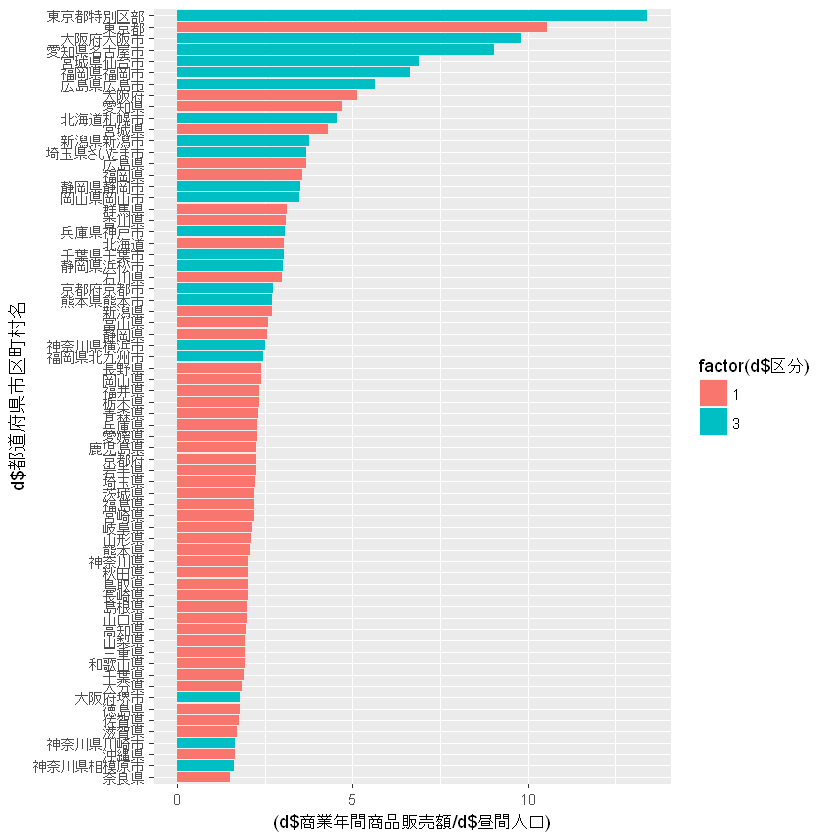

In [27]:
d <- rbind(d1,d3)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"商業年間商品販売額" / d$"昼間人口") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"商業年間商品販売額" / d$"昼間人口"))))
g <- g + coord_flip()
plot(g)

## 政令指定都市とそれ以外の県庁所在地の「商品販売額÷昼間人口」を比較する

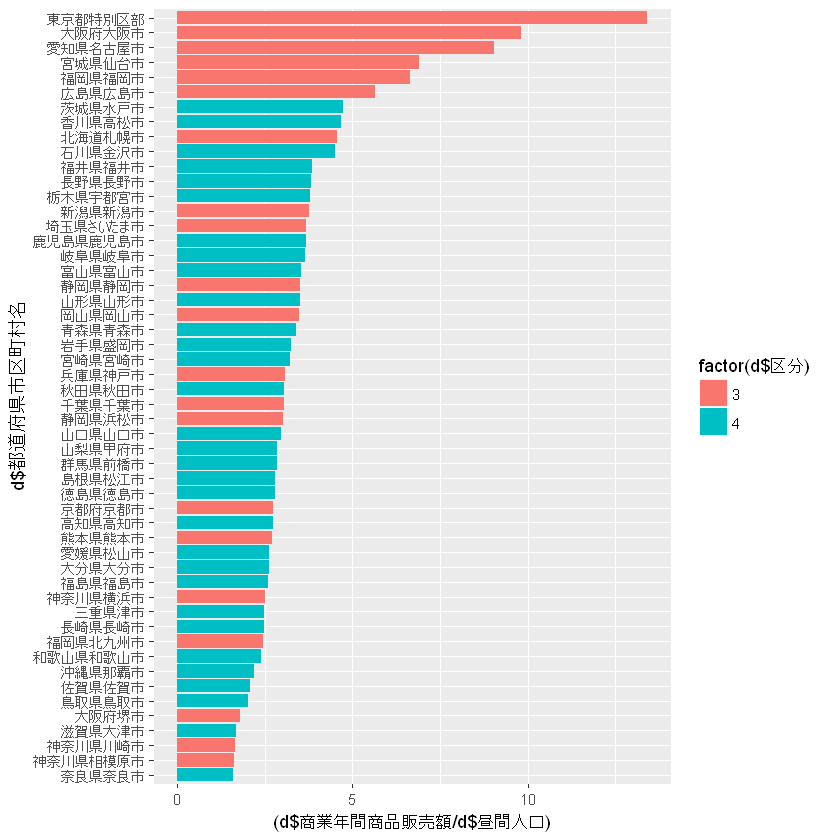

In [28]:
d <- rbind(d3,d4)
g <- ggplot(d,aes(x = d$"都道府県市区町村名",y= (d$"商業年間商品販売額" / d$"昼間人口") ,fill=factor(d$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(d$"都道府県市区町村名", (d$"商業年間商品販売額" / d$"昼間人口"))))
g <- g + coord_flip()
plot(g)

## 人口が鳥取県以上の自治体

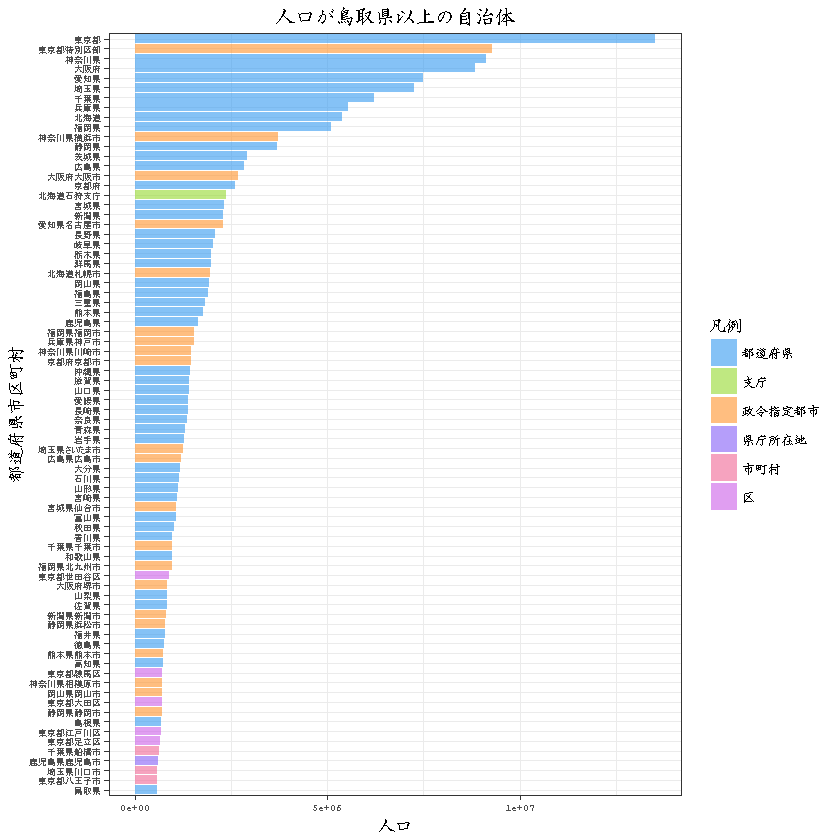

In [31]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
das <- subset(da, da$"人口総数">573440)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口が鳥取県以上の自治体")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

世田谷区より人口の少ない県がゴロゴロ。

## 面積が島嶼部を除く東京都以上の自治体

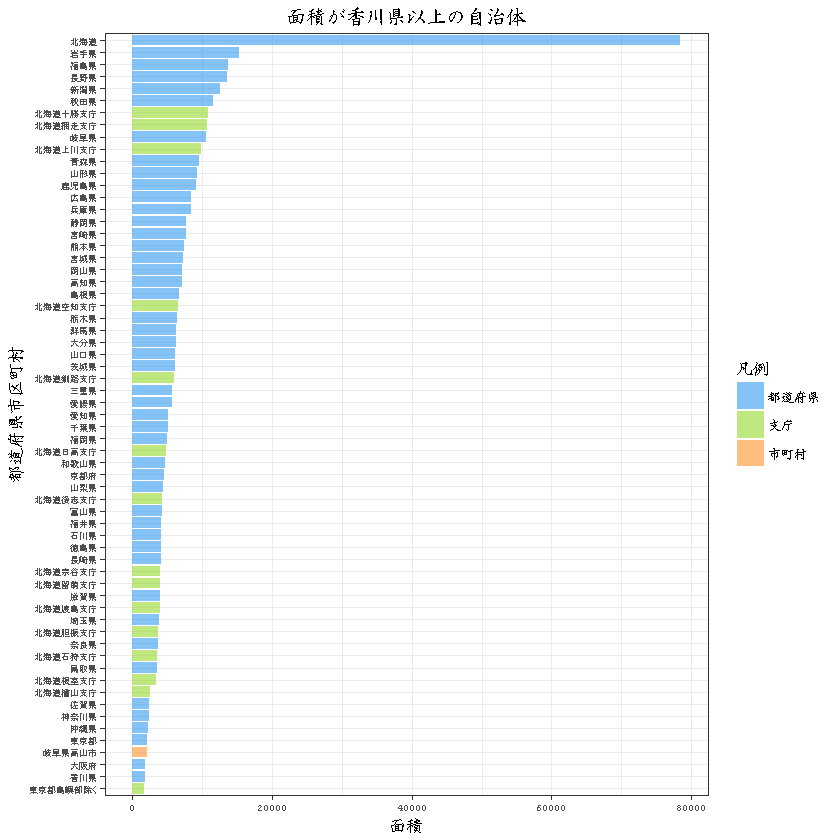

In [34]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
das <- subset(da, da$"総面積">1778)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
# タイトルを変更
g <- g + labs(title="面積が香川県以上の自治体")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5)
                          ,labels=c("都道府県", "支庁", "市町村"))
g <- g + coord_flip()
plot(g)

香川県より広い市が!

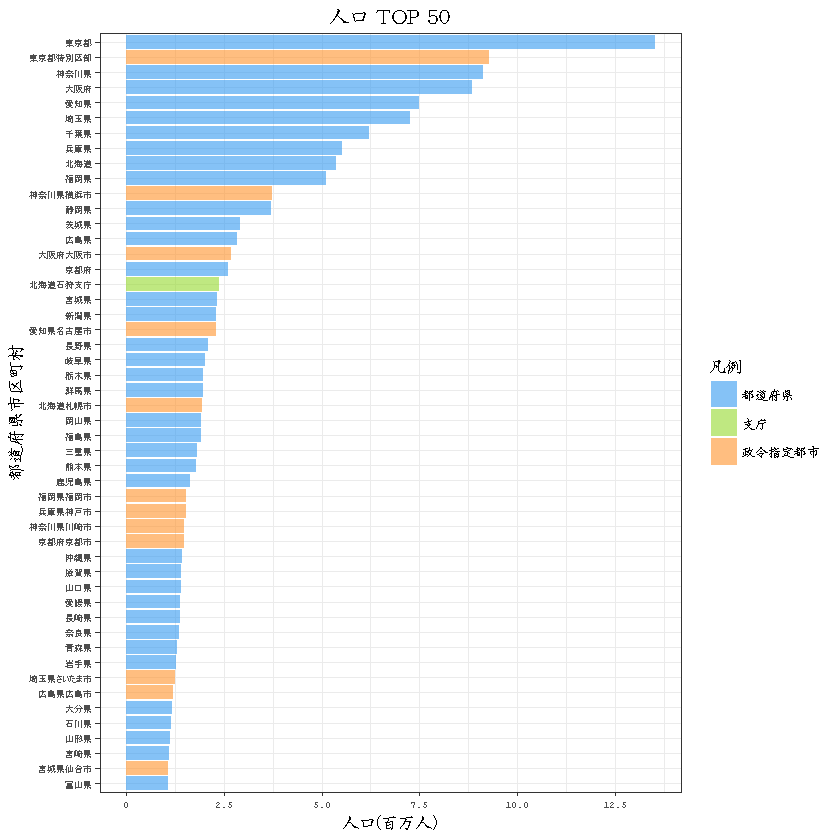

In [165]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
ds <- da[order(da$"人口総数", decreasing=T),]
das <- head(ds, n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + scale_y_continuous(breaks=c(0,2500000,5000000,7500000,10000000,12500000),labels=c("0","2.5","5.0","7.5","10.0","12.5"))
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口 TOP 50")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口(百万人)")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

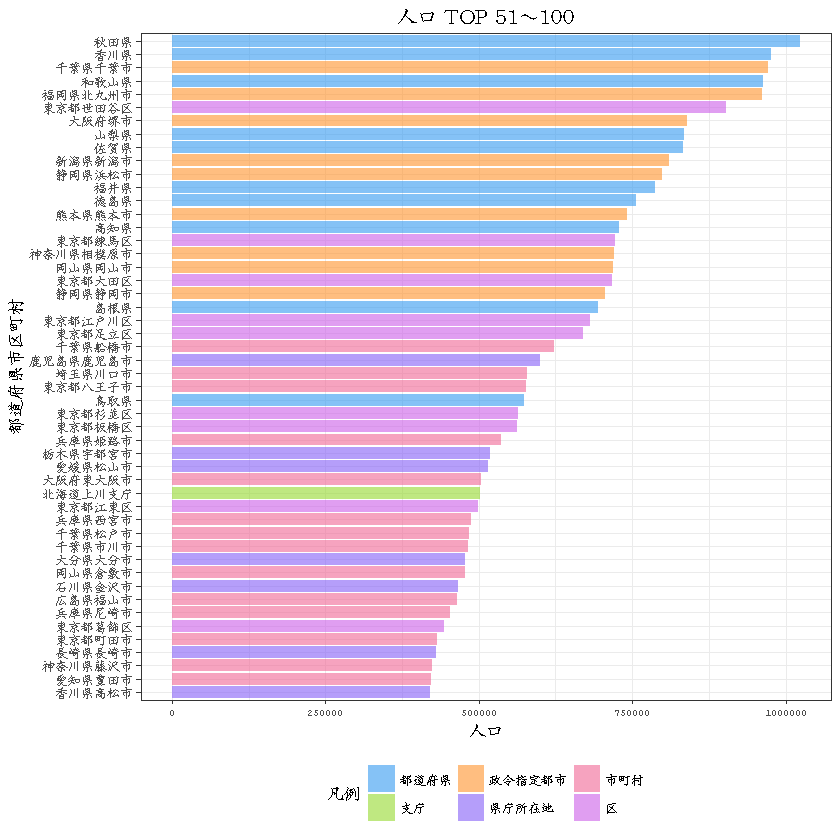

In [167]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
ds <- da[order(da$"人口総数", decreasing=T),]
das <- tail(head(ds, n=100), n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口 TOP 51～100")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    legend.position="bottom",
    axis.text.x=element_text(family="COURIER", size=6),
    axis.text.y=element_text(family="HGKAI", size=8)
)
# 色を指定
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

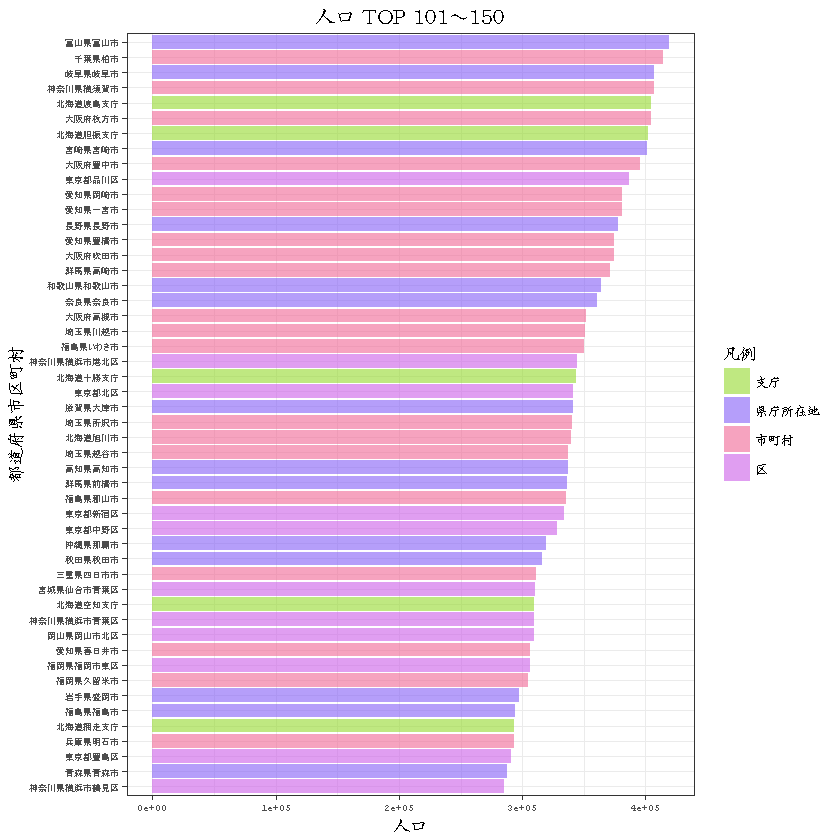

In [41]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
ds <- da[order(da$"人口総数", decreasing=T),]
das <- tail(head(ds, n=150), n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口 TOP 101～150")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(LIME_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("支庁", "県庁所在地", "市町村", "区"))
plot(g)

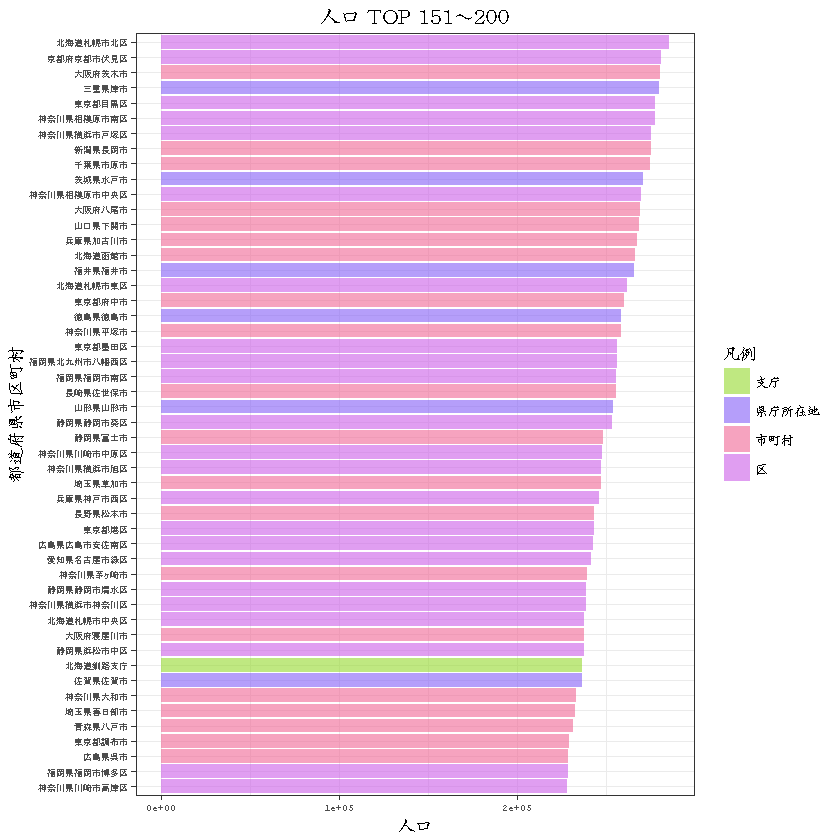

In [42]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
ds <- da[order(da$"人口総数", decreasing=T),]
das <- tail(head(ds, n=200), n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口 TOP 151～200")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(LIME_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("支庁", "県庁所在地", "市町村", "区"))
plot(g)

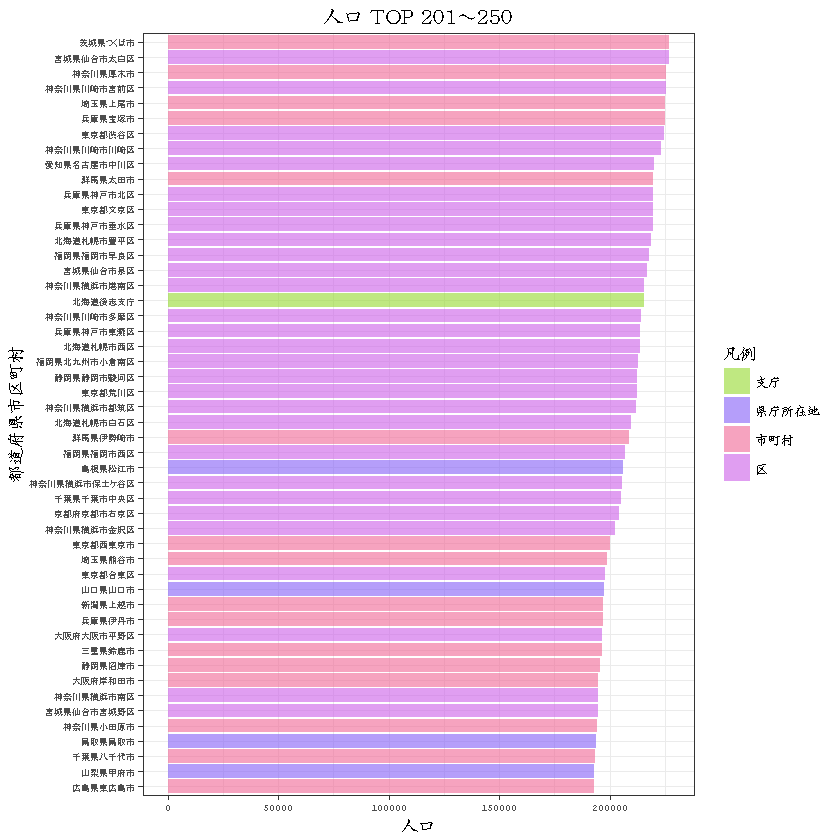

In [43]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
ds <- da[order(da$"人口総数", decreasing=T),]
das <- tail(head(ds, n=250), n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口 TOP 201～250")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(LIME_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("支庁", "県庁所在地", "市町村", "区"))
plot(g)

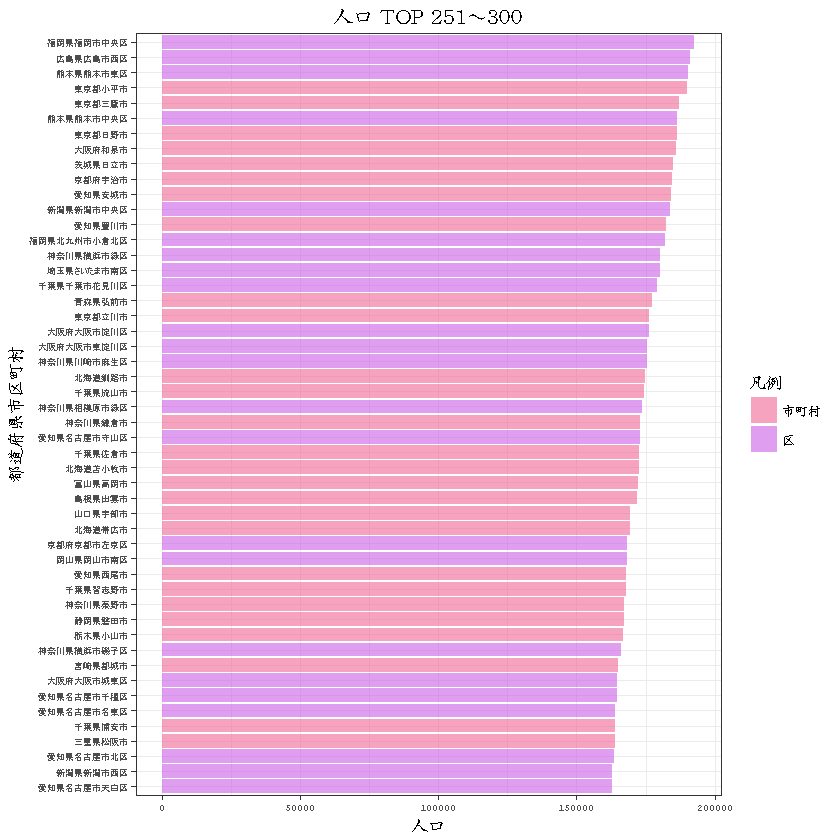

In [46]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d3,d4,d5,d6)
ds <- da[order(da$"人口総数", decreasing=T),]
das <- tail(head(ds, n=300), n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"人口総数",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"人口総数")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口 TOP 251～300")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(PINK_5, GRAPE_5, RED_5)
                          ,labels=c("市町村", "区"))
plot(g)

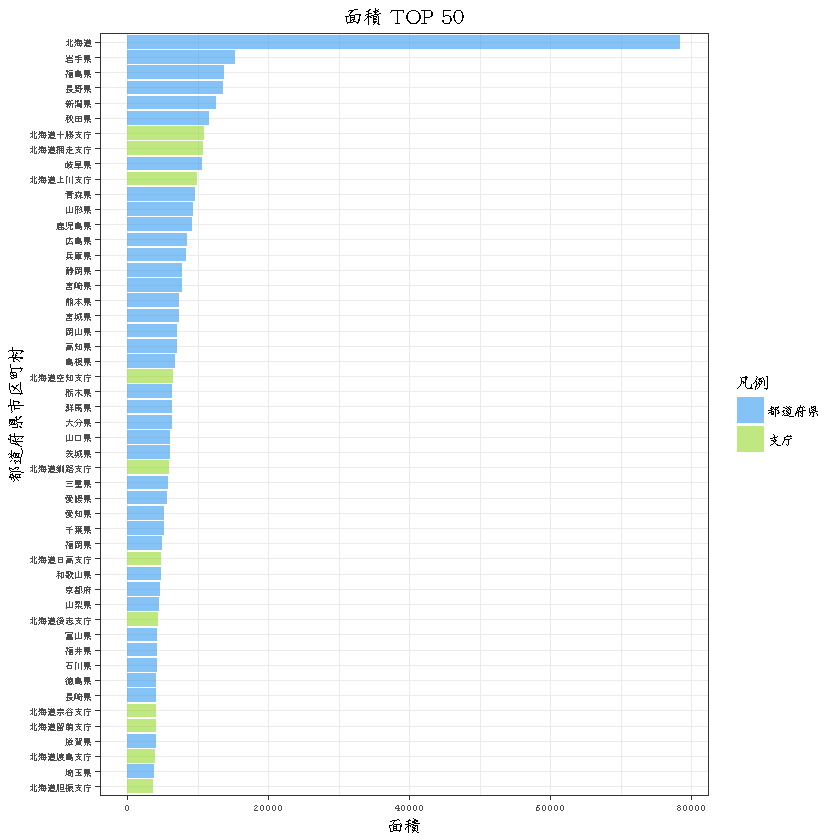

In [52]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order(da$"総面積", decreasing=T),]
das <- head(ds, n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="面積 TOP 50")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

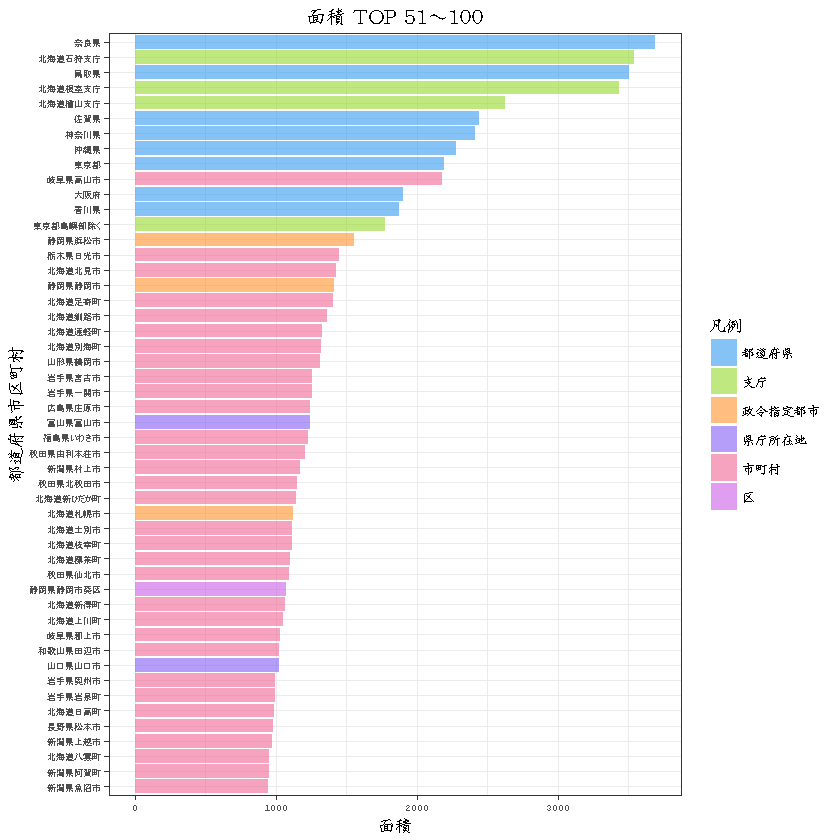

In [51]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order(da$"総面積", decreasing=T),]
das <- tail(head(ds, n=100),50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="面積 TOP 51～100")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

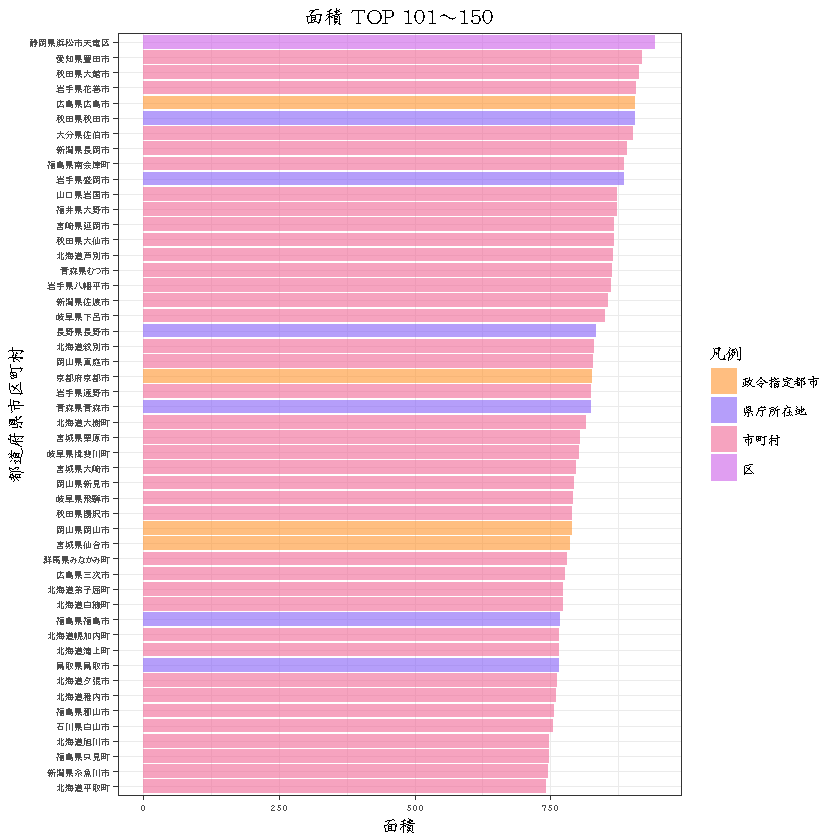

In [53]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order(da$"総面積", decreasing=T),]
das <- tail(head(ds, n=150),50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="面積 TOP 101～150")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

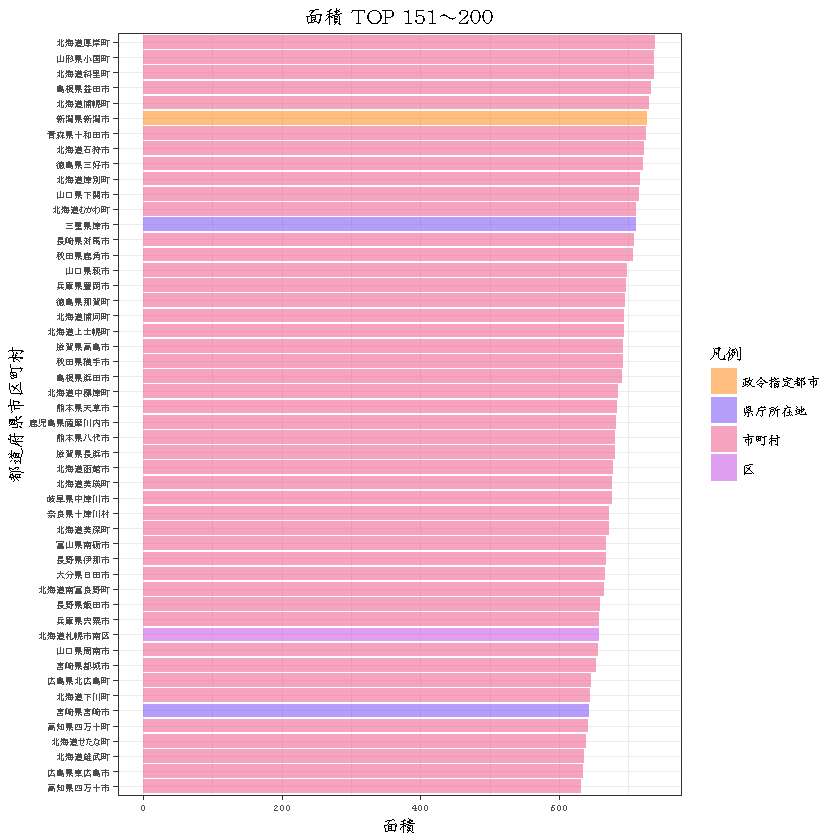

In [54]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order(da$"総面積", decreasing=T),]
das <- tail(head(ds, n=200),50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="面積 TOP 151～200")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

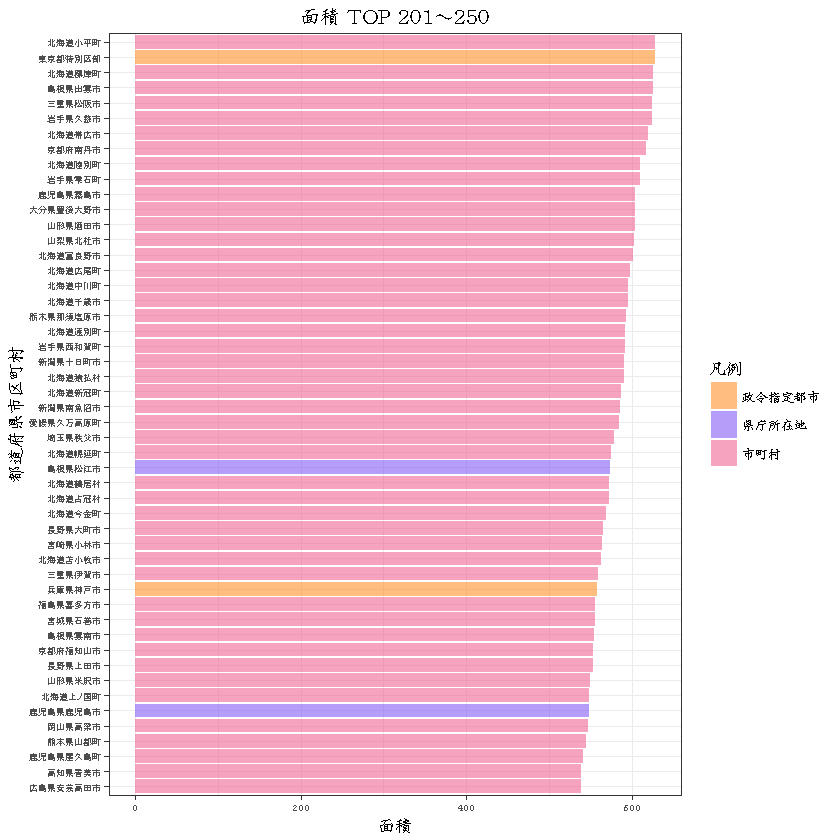

In [55]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order(da$"総面積", decreasing=T),]
das <- tail(head(ds, n=250),50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="面積 TOP 201～250")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

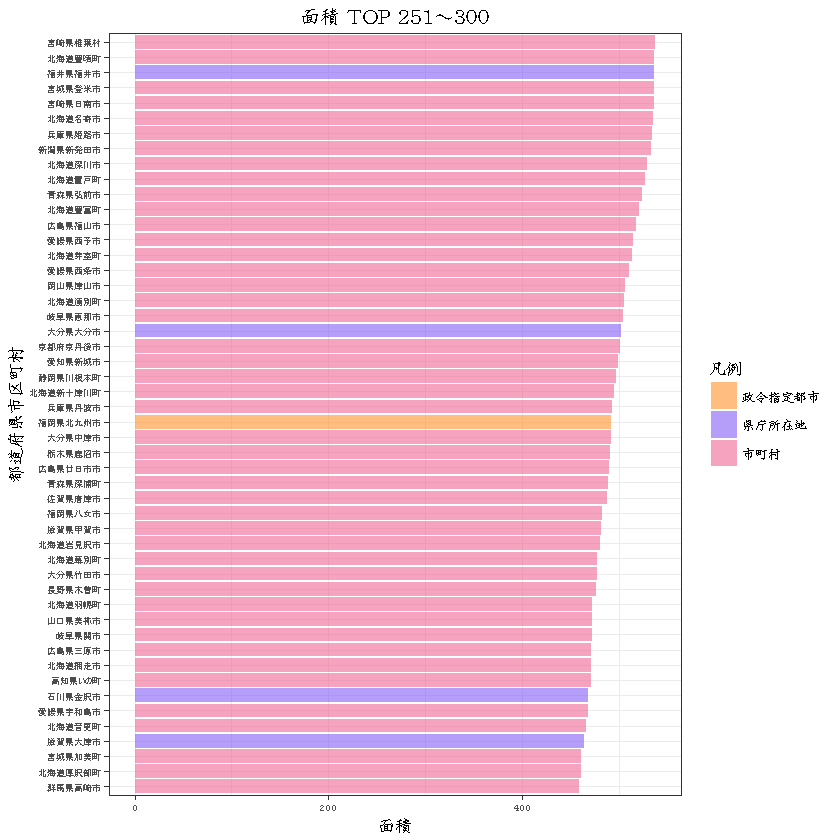

In [56]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order(da$"総面積", decreasing=T),]
das <- tail(head(ds, n=300),50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= das$"総面積",fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",das$"総面積")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="面積 TOP 251～300")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("面積")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=6)
)
# 色を指定
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

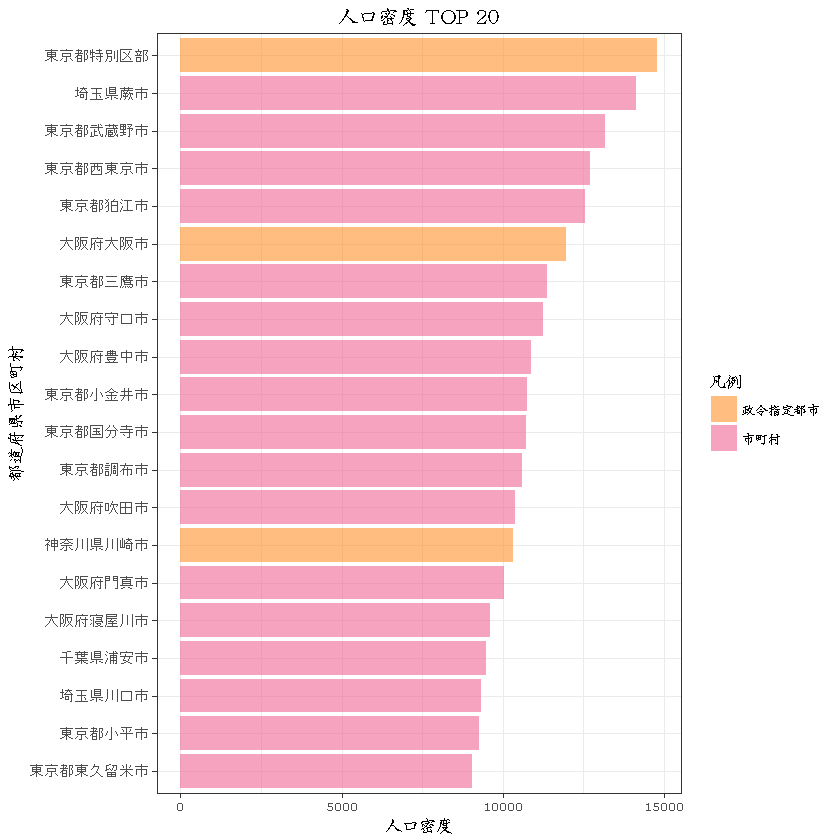

In [86]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- head(ds, n=20)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 20")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "市町村", "区"))
plot(g)

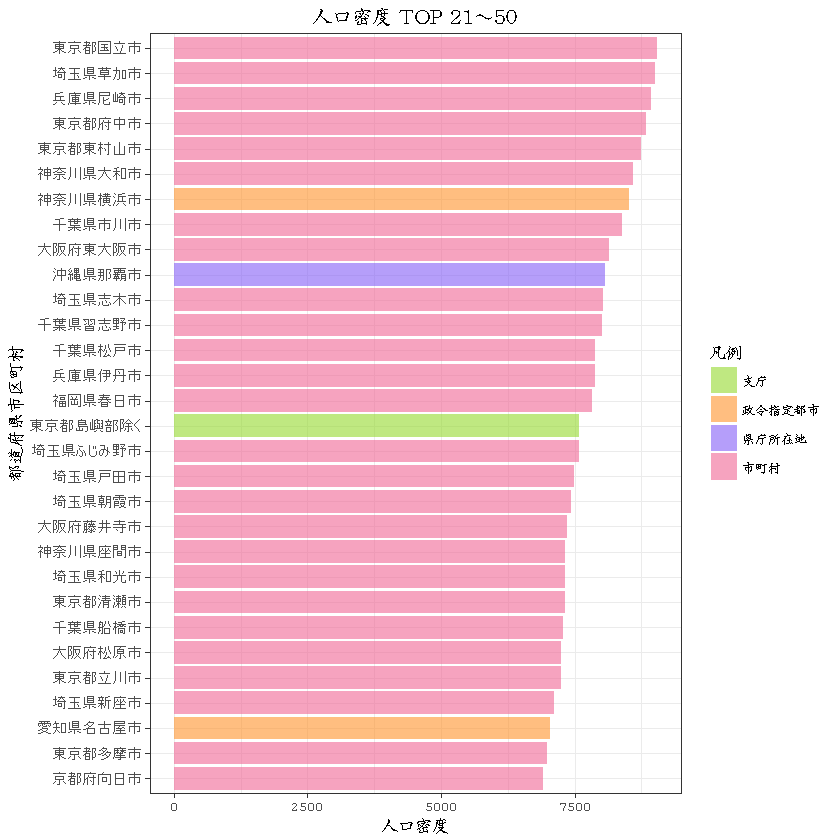

In [88]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- tail(head(ds, n=50),n=30)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 21～50")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

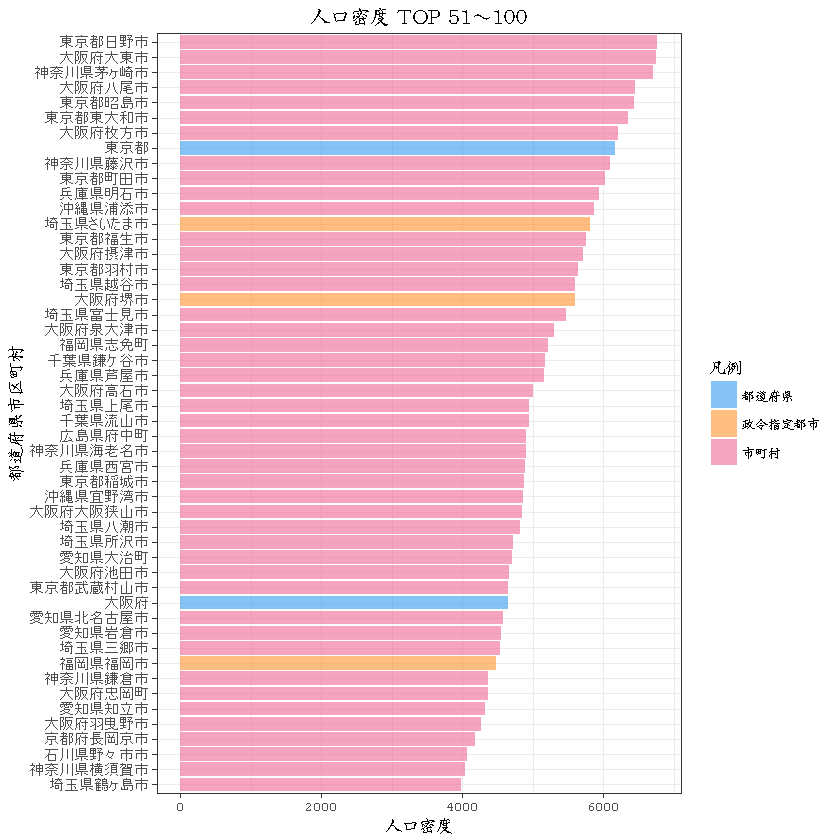

In [92]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- tail(head(ds, n=100),n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 51～100")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(BLUE_5, ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "政令指定都市", "市町村", "区"))
plot(g)

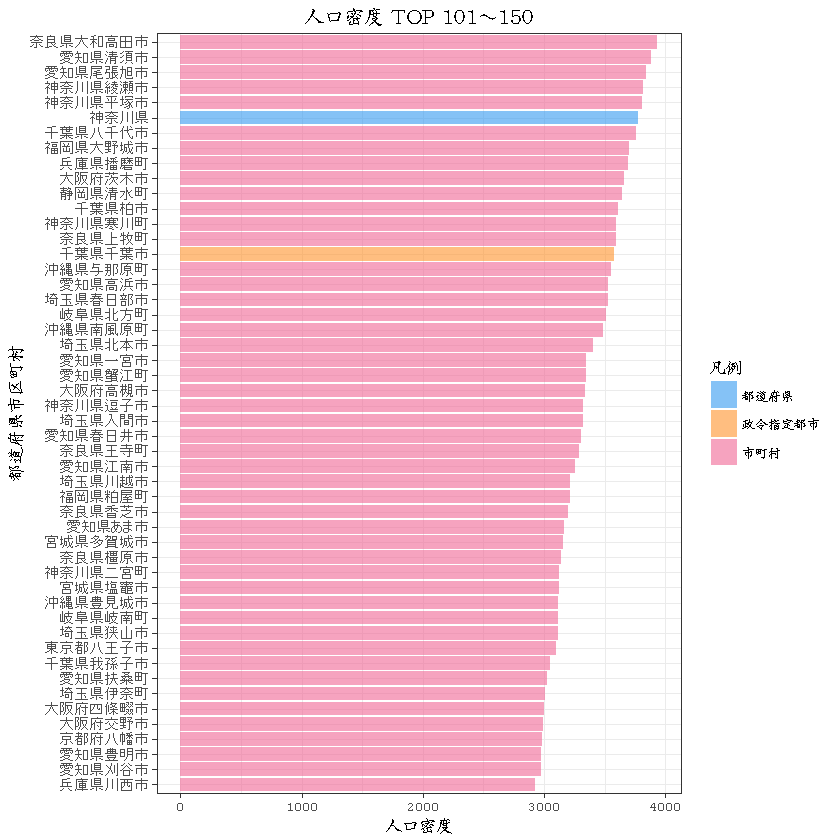

In [95]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- tail(head(ds, n=150),n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 101～150")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(BLUE_5, ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "政令指定都市", "市町村", "区"))
plot(g)

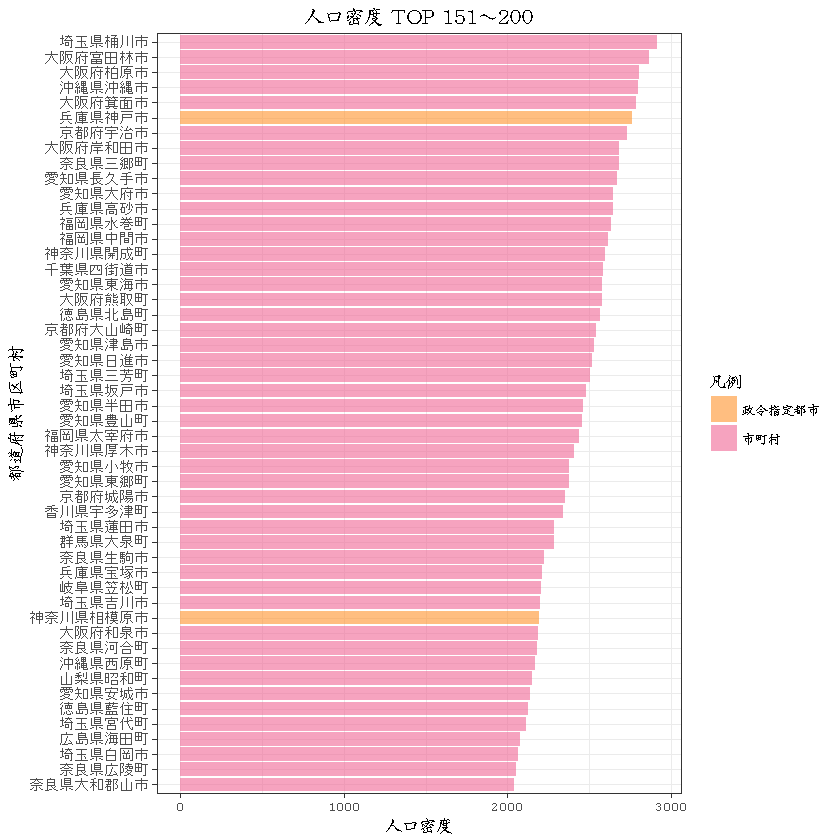

In [98]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- tail(head(ds, n=200),n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 151～200")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "市町村", "区"))
plot(g)

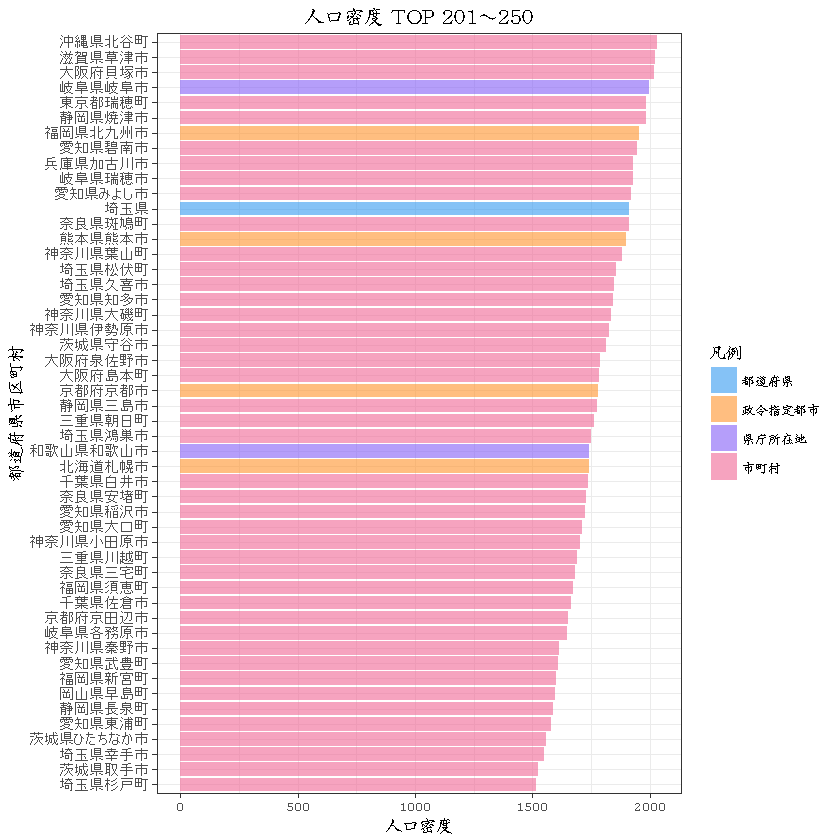

In [100]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- tail(head(ds, n=250),n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 201～250")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(BLUE_5,  ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

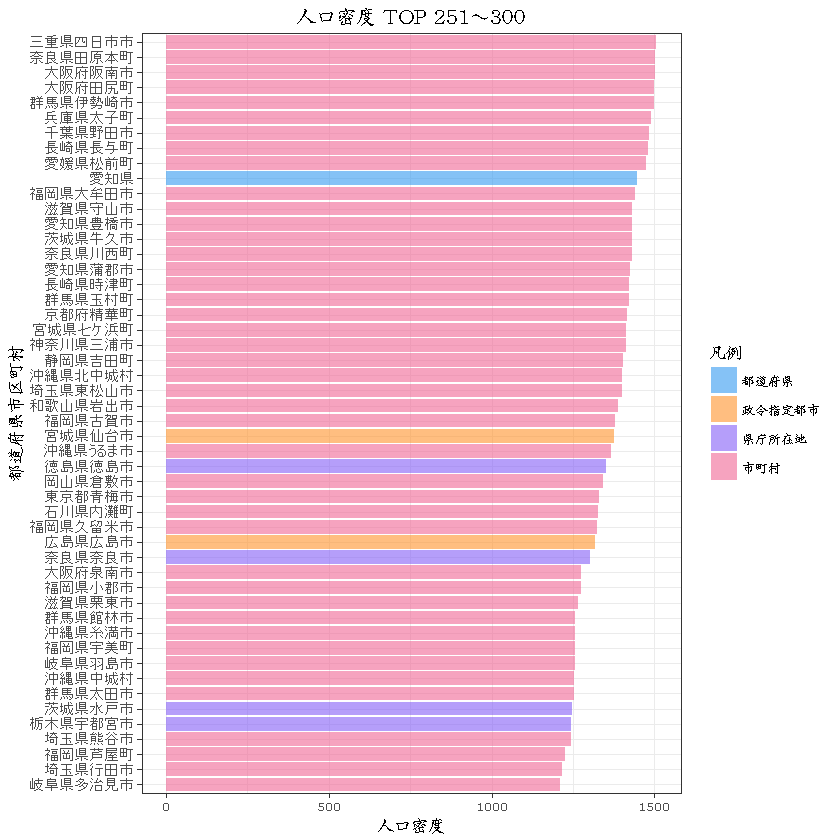

In [102]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5)
ds <- da[order((da$"人口総数" / da$"総面積"), decreasing=T),]
das <- tail(head(ds, n=300),n=50)
g <- ggplot(das,aes(x = das$"都道府県市区町村名",y= (das$"人口総数" / das$"総面積"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"人口総数" / das$"総面積"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="人口密度 TOP 251～300")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("人口密度")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(BLUE_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

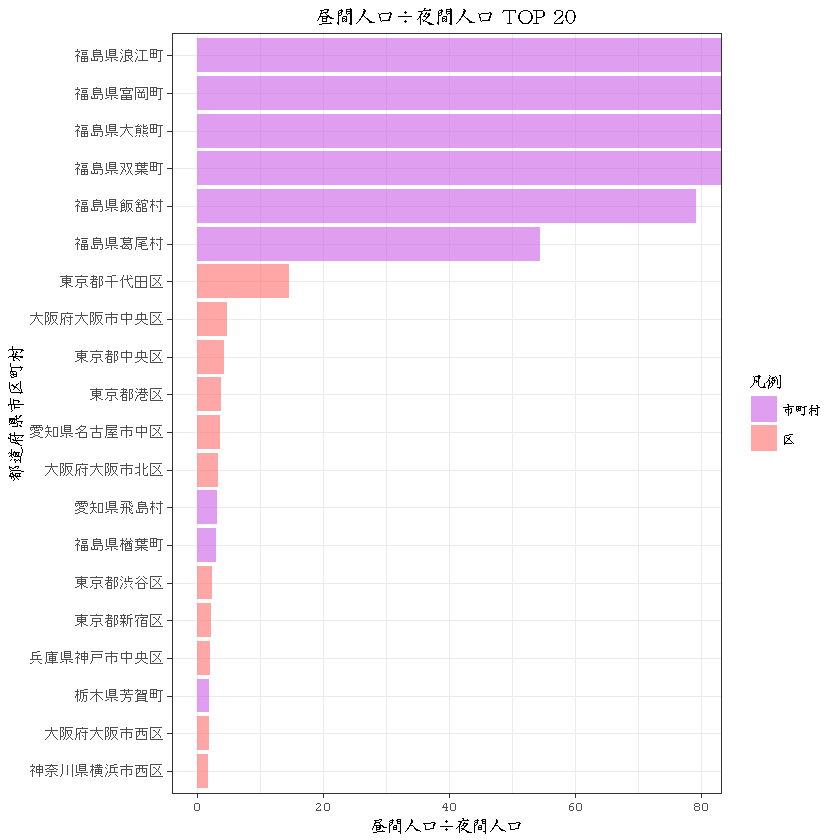

In [114]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- head(ds, n=20)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 20")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(GRAPE_5, RED_5)
                          ,labels=c("市町村", "区"))
plot(g)

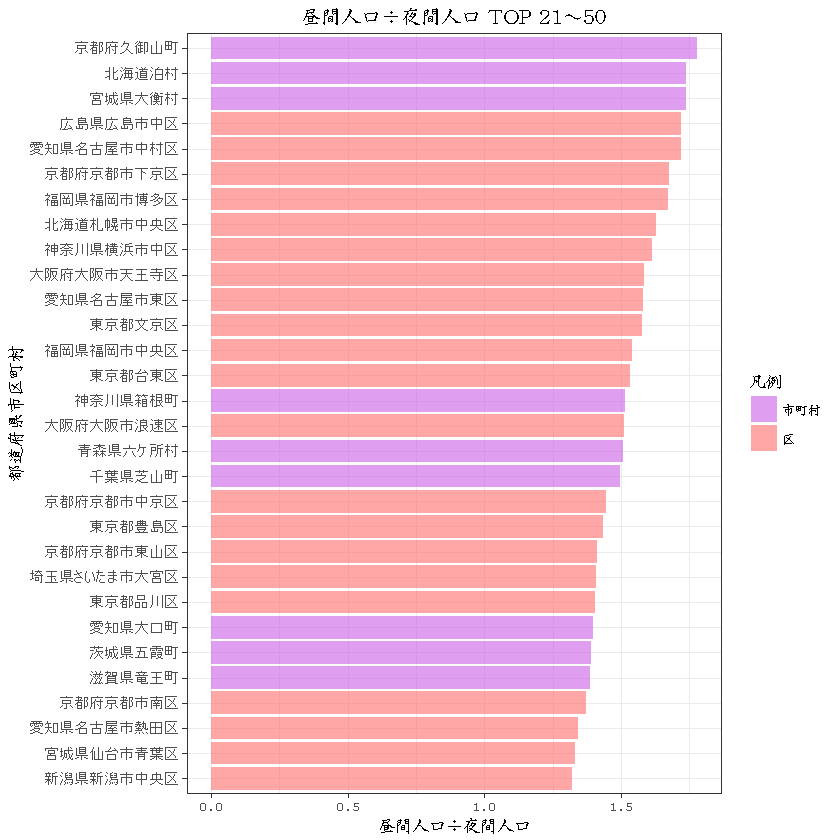

In [115]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- tail(head(ds, n=50),n=30)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 21～50")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(GRAPE_5, RED_5)
                          ,labels=c("市町村", "区"))
plot(g)

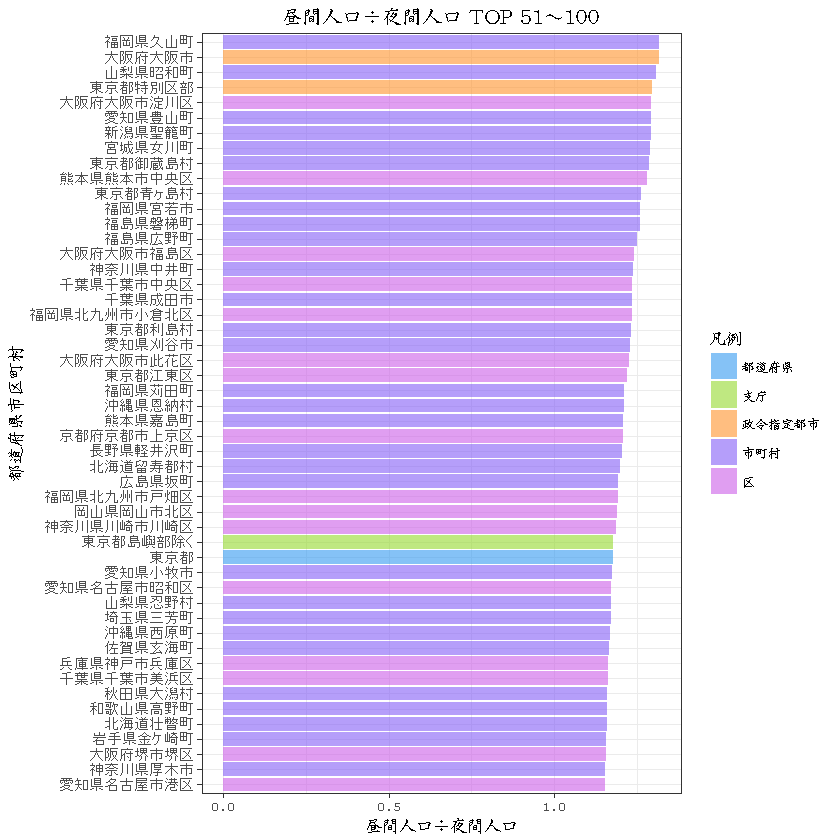

In [118]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- tail(head(ds, n=100),n=50)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 51～100")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "支庁", "政令指定都市", "市町村", "区"))
plot(g)

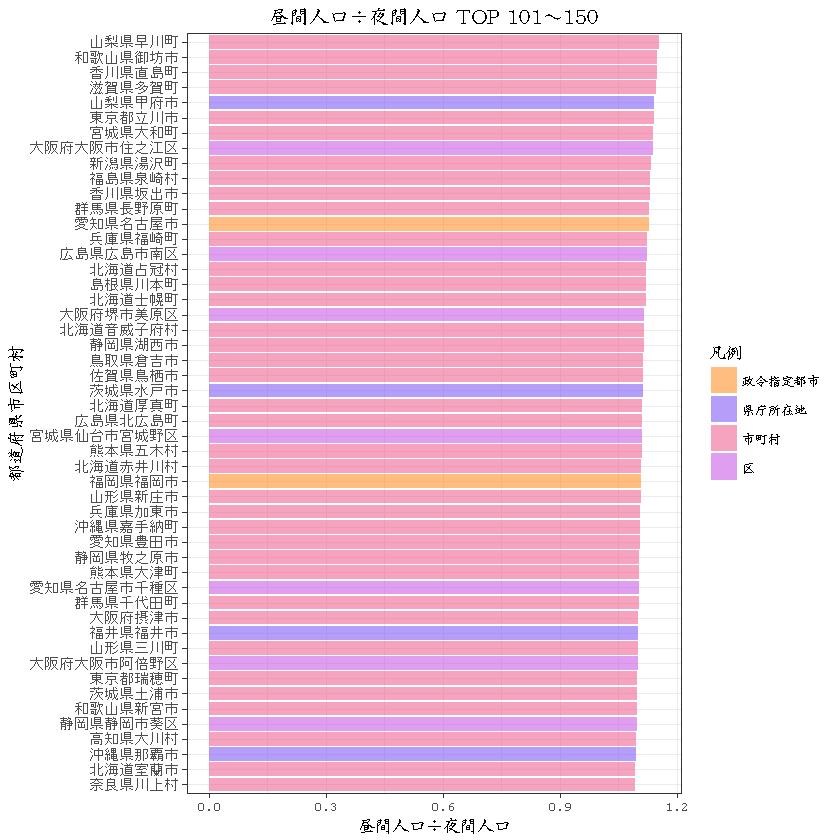

In [121]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- tail(head(ds, n=150),n=50)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 101～150")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

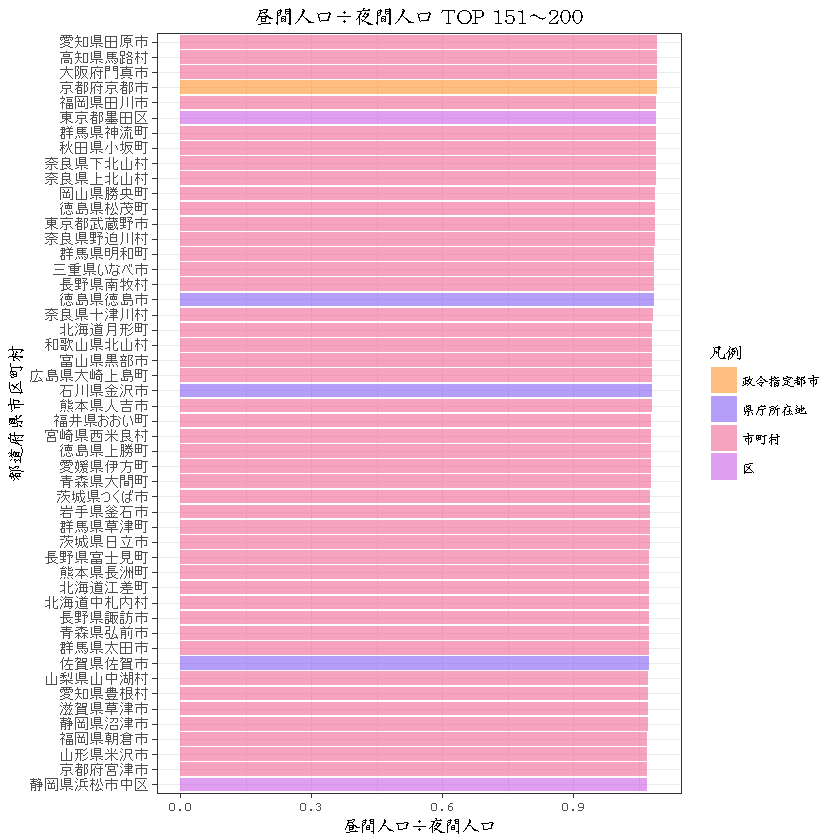

In [124]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- tail(head(ds, n=200),n=50)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 151～200")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

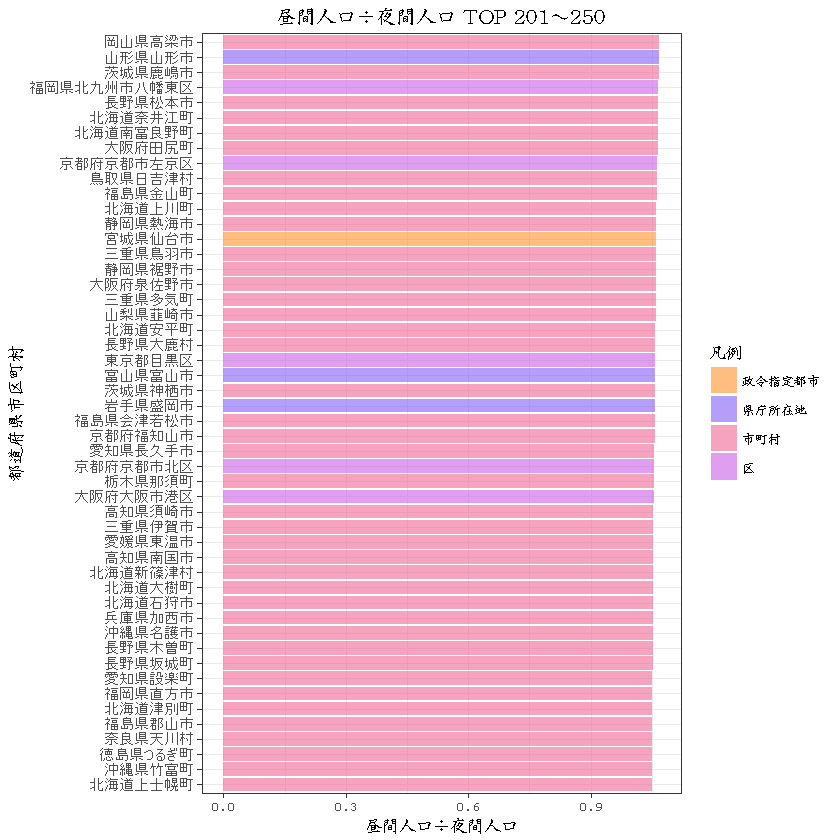

In [127]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- tail(head(ds, n=250),n=50)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 201～250")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "県庁所在地", "市町村", "区"))
plot(g)

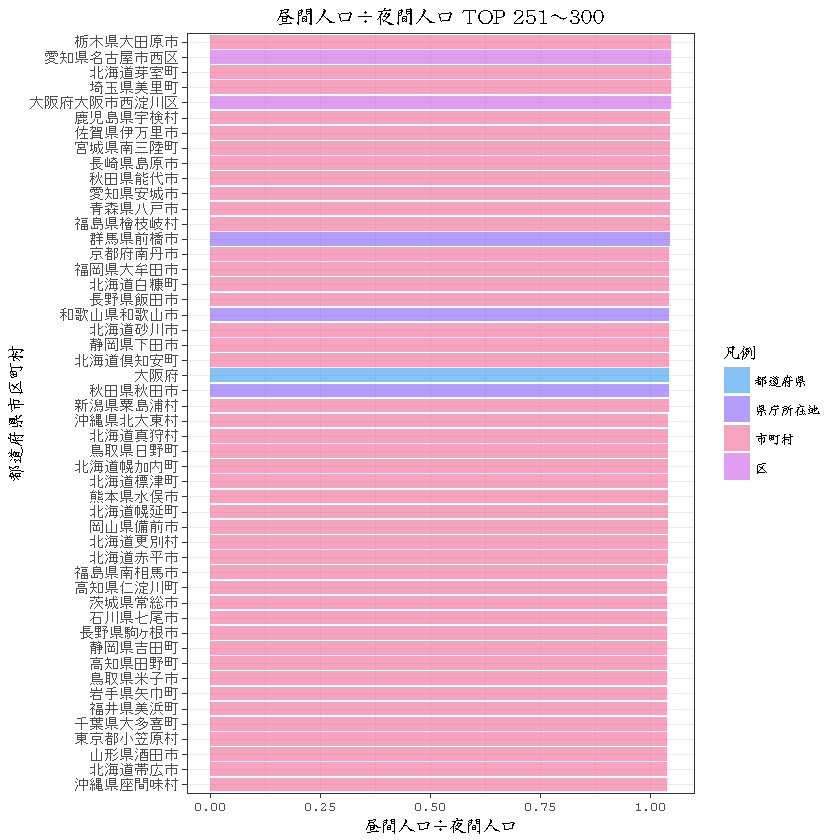

In [130]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
ds <- da[order((da$"昼間人口" / da$"人口総数"), decreasing=T),]
das <- tail(head(ds, n=300),n=50)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"昼間人口" / das$"人口総数"),fill=factor(das$"区分")))
g <- g + geom_bar(stat = "identity",aes(x=reorder(das$"都道府県市区町村名",(das$"昼間人口" / das$"人口総数"))),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="昼間人口÷夜間人口 TOP 251～300")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("昼間人口÷夜間人口")
g <- g + labs(fill="凡例")
# 凡例を変更
g <- g + guides(
    fill=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_fill_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_fill_manual( values=c(BLUE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("都道府県", "県庁所在地", "市町村", "区"))
plot(g)

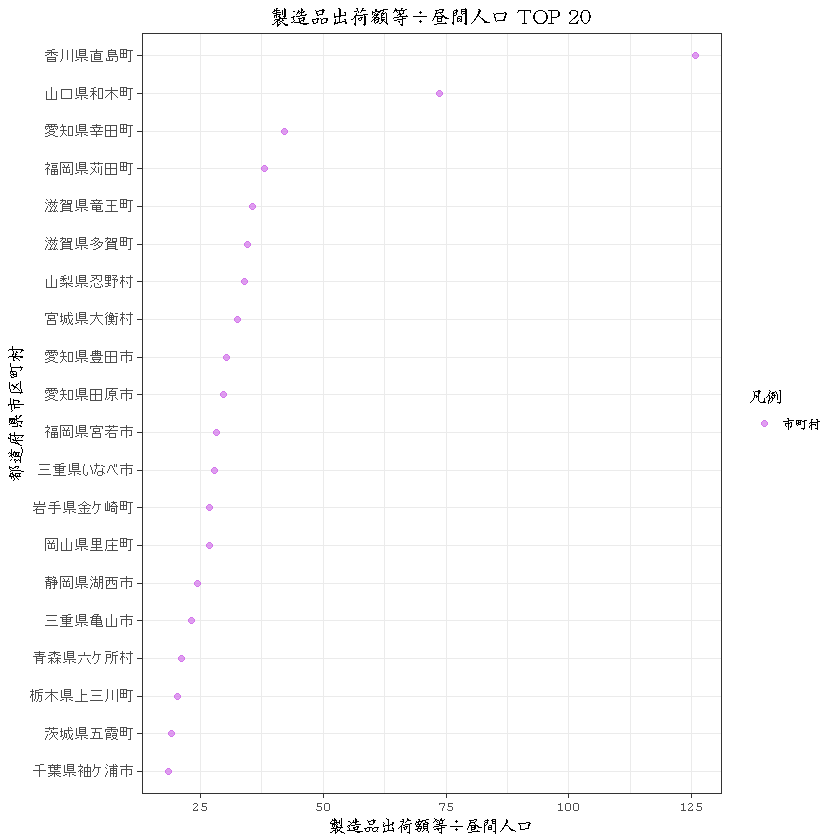

In [147]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order((da$"製造品出荷額等" / da$"昼間人口"), decreasing=T),]
das <- head(ds, n=20)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"製造品出荷額等" / das$"昼間人口")))
g <- g + geom_point(aes(x=reorder(das$"都道府県市区町村名",(das$"製造品出荷額等" / das$"昼間人口")),color=factor(das$"区分")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="製造品出荷額等÷昼間人口 TOP 20")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("製造品出荷額等÷昼間人口")
g <- g + labs(colour="凡例")
# 凡例を変更
g <- g + guides(
    color=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_color_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_color_manual( values=c(GRAPE_5, RED_5)
                          ,labels=c("市町村", "区"))
plot(g)


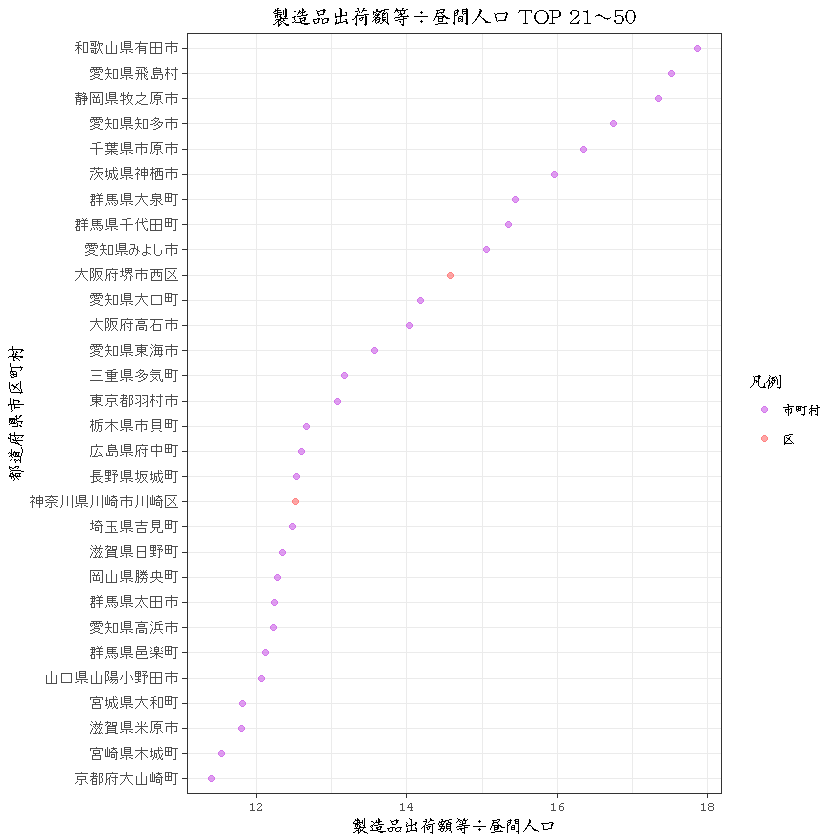

In [148]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order((da$"製造品出荷額等" / da$"昼間人口"), decreasing=T),]
das <- tail(head(ds, n=50), n=30)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"製造品出荷額等" / das$"昼間人口")))
g <- g + geom_point(aes(x=reorder(das$"都道府県市区町村名",(das$"製造品出荷額等" / das$"昼間人口")),color=factor(das$"区分")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="製造品出荷額等÷昼間人口 TOP 21～50")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("製造品出荷額等÷昼間人口")
g <- g + labs(colour="凡例")
# 凡例を変更
g <- g + guides(
    color=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_color_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_color_manual( values=c(GRAPE_5, RED_5)
                          ,labels=c("市町村", "区"))
plot(g)


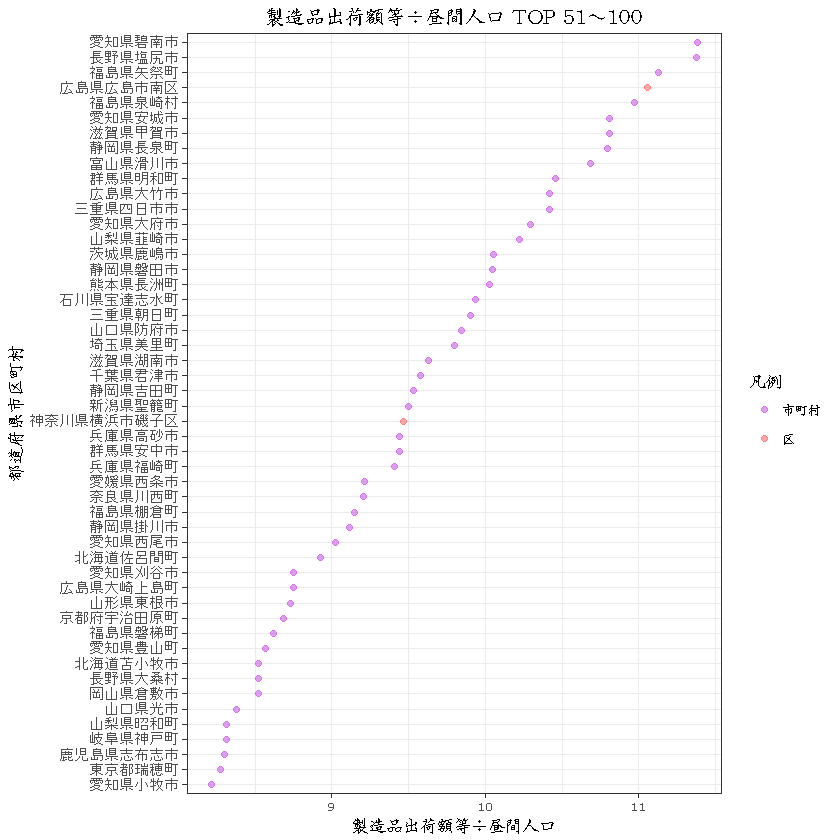

In [150]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order((da$"製造品出荷額等" / da$"昼間人口"), decreasing=T),]
das <- tail(head(ds, n=100), n=50)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"製造品出荷額等" / das$"昼間人口")))
g <- g + geom_point(aes(x=reorder(das$"都道府県市区町村名",(das$"製造品出荷額等" / das$"昼間人口")),color=factor(das$"区分")),alpha=0.6)
g <- g + coord_flip()
# タイトルを変更
g <- g + labs(title="製造品出荷額等÷昼間人口 TOP 51～100")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("製造品出荷額等÷昼間人口")
g <- g + labs(colour="凡例")
# 凡例を変更
g <- g + guides(
    color=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    axis.text=element_text(family="COURIER", size=8)
)
# 色を指定
#g <- g + scale_color_manual( values=c(BLUE_5, LIME_5, ORANGE_5, VIOLET_5, PINK_5, GRAPE_5, RED_5)
#                          ,labels=c("都道府県", "支庁", "政令指定都市", "県庁所在地", "市町村", "区"))
g <- g + scale_color_manual( values=c(GRAPE_5, RED_5)
                          ,labels=c("市町村", "区"))
plot(g)


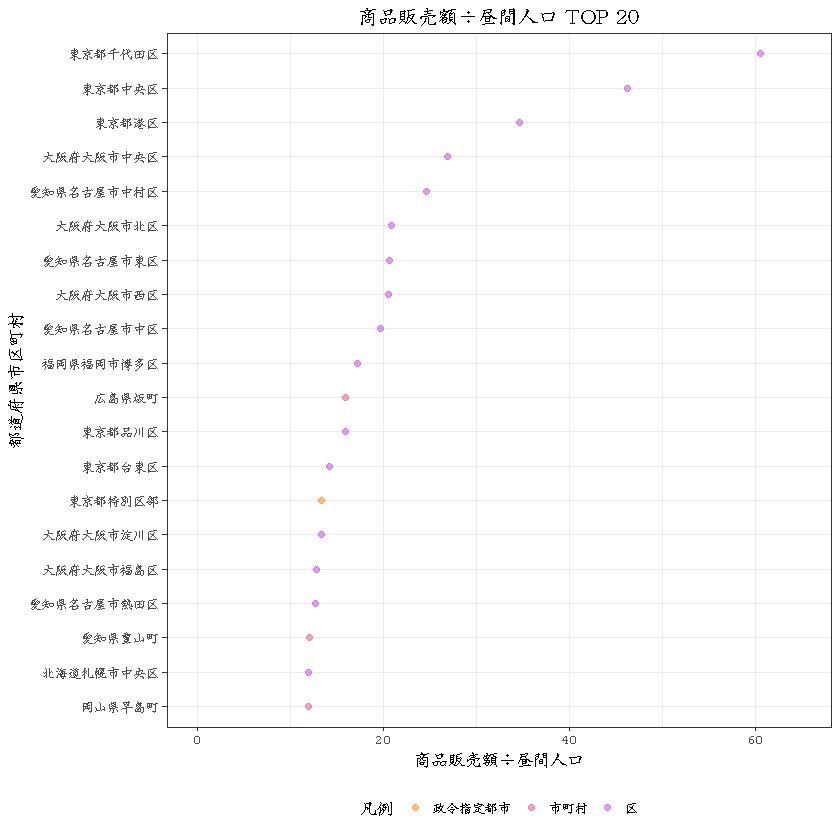

In [161]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order((da$"商業年間商品販売額" / da$"昼間人口"), decreasing=T),]
das <- head(ds, n=20)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"商業年間商品販売額" / das$"昼間人口")))
g <- g + geom_point(aes(x=reorder(das$"都道府県市区町村名",(das$"商業年間商品販売額" / das$"昼間人口")),color=factor(das$"区分")),alpha=0.6)
g <- g + ylim(0,65)
# タイトルを変更
g <- g + labs(title="商品販売額÷昼間人口 TOP 20")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("商品販売額÷昼間人口")
g <- g + labs(colour="凡例")
# 凡例を変更
g <- g + guides(
    color=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    legend.position="bottom",
    axis.text.y=element_text(family="HGKAI", size=8),
    axis.text.x=element_text(family="COURIER", size=8)
)
# 色を指定
g <- g + scale_color_manual( values=c(ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "市町村", "区"))
g <- g + coord_flip()
plot(g)


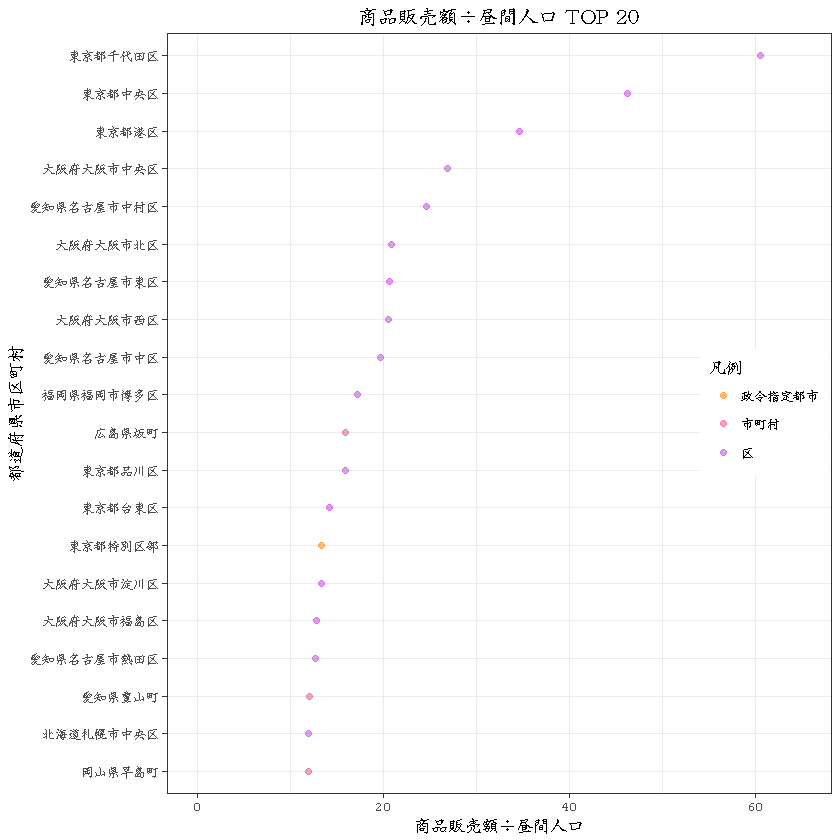

In [173]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order((da$"商業年間商品販売額" / da$"昼間人口"), decreasing=T),]
das <- head(ds, n=20)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"商業年間商品販売額" / das$"昼間人口")))
g <- g + geom_point(aes(x=reorder(das$"都道府県市区町村名",(das$"商業年間商品販売額" / das$"昼間人口")),color=factor(das$"区分")),alpha=0.6)
g <- g + ylim(0,65)
# タイトルを変更
g <- g + labs(title="商品販売額÷昼間人口 TOP 20")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("商品販売額÷昼間人口")
g <- g + labs(colour="凡例")
# 凡例を変更
g <- g + guides(
    color=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    legend.position=c(0.9,0.5),
    axis.text.y=element_text(family="HGKAI", size=8),
    axis.text.x=element_text(family="COURIER", size=8)
)
# 色を指定
g <- g + scale_color_manual( values=c(ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "市町村", "区"))
g <- g + coord_flip()
plot(g)


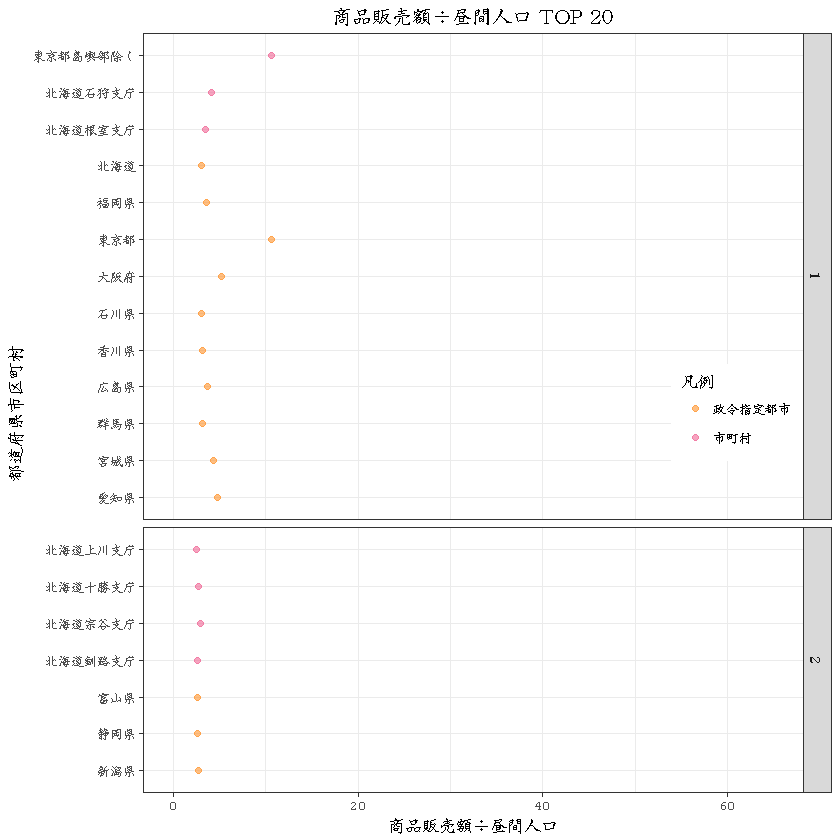

In [177]:
RED_5    <- "#ff6b6b"
PINK_5   <- "#f06595"
GRAPE_5  <- "#cc5de8"
VIOLET_5 <- "#845ef7"
INDIGO_5 <- "#5c7cfa"
BLUE_5   <- "#339af0"
CYAN_5   <- "#22b8cf"
TEAL_5   <- "#20c997"
GREEN_5  <- "#51cf66"
LIME_5   <- "#94d82d"
YELLOW_5 <- "#fcc419"
ORANGE_5 <- "#ff922b"

windowsFonts(HGKAI=windowsFont("HG正楷書体-PRO"))
windowsFonts(COURIER=windowsFont("Courier New"))

# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22) #,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order((da$"商業年間商品販売額" / da$"昼間人口"), decreasing=T),]
das <- head(ds, n=20)
g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= (das$"商業年間商品販売額" / das$"昼間人口")))
g <- g + geom_point(aes(color=factor(das$"区分")),alpha=0.6)
g <- g + ylim(0,65)
g <- g + facet_grid(das$"区分" ~., scales = "free_y", space = "free_y")
# タイトルを変更
g <- g + labs(title="商品販売額÷昼間人口 TOP 20")
g <- g + xlab("都道府県市区町村")
g <- g + ylab("商品販売額÷昼間人口")
g <- g + labs(colour="凡例")
# 凡例を変更
g <- g + guides(
    color=guide_legend(
        "凡例", 
        order=1
    )
)
# フォントを指定
g <- g + theme_bw(
    base_size=10, 
    base_family="HGKAI"
)
# テーマを指定
g <- g + theme(
    plot.title=element_text(hjust=0.5),
    legend.position=c(0.9,0.5),
    axis.text.y=element_text(family="HGKAI", size=8),
    axis.text.x=element_text(family="COURIER", size=8)
)
# 色を指定
g <- g + scale_color_manual( values=c(ORANGE_5, PINK_5, GRAPE_5, RED_5)
                          ,labels=c("政令指定都市", "市町村", "区"))
g <- g + coord_flip()
plot(g)


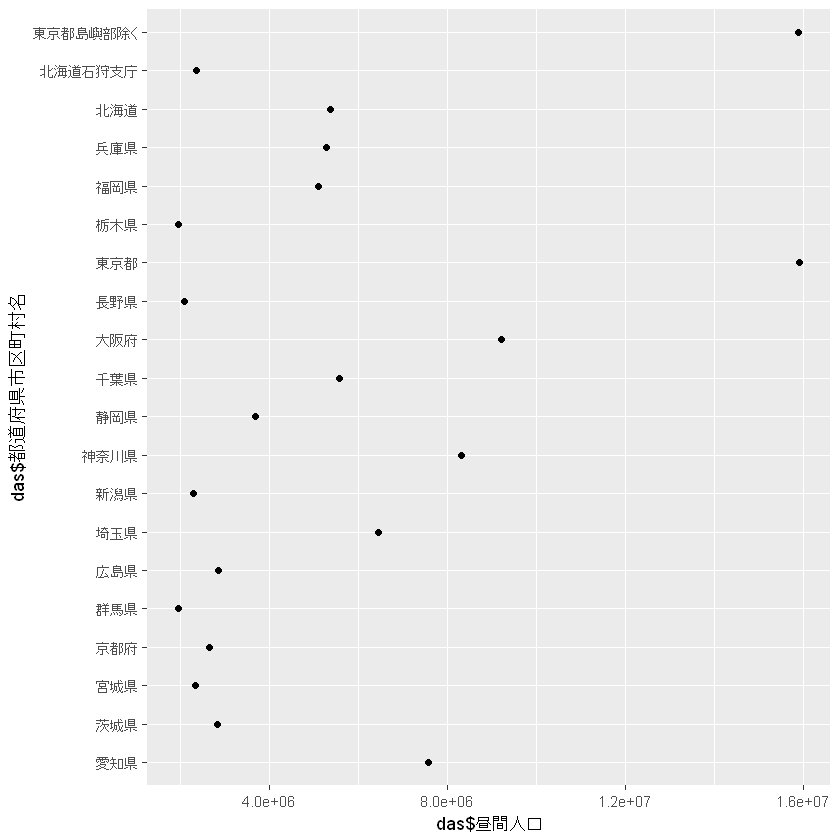

In [195]:
# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22) #,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order(da$"昼間人口", decreasing=T),]
das <- head(ds, n=20)
#das

g <- ggplot(das, aes(x = das$"都道府県市区町村名",y= das$"昼間人口"))
g <- g + geom_point() #aes(x=reorder(das$"都道府県市区町村名",das$"区分"),color=factor(das$"区分")))
#g <- g + facet_grid(das$"区分"~., scales = "free_y",   space = "free_y")
g <- g + coord_flip()
plot(g)


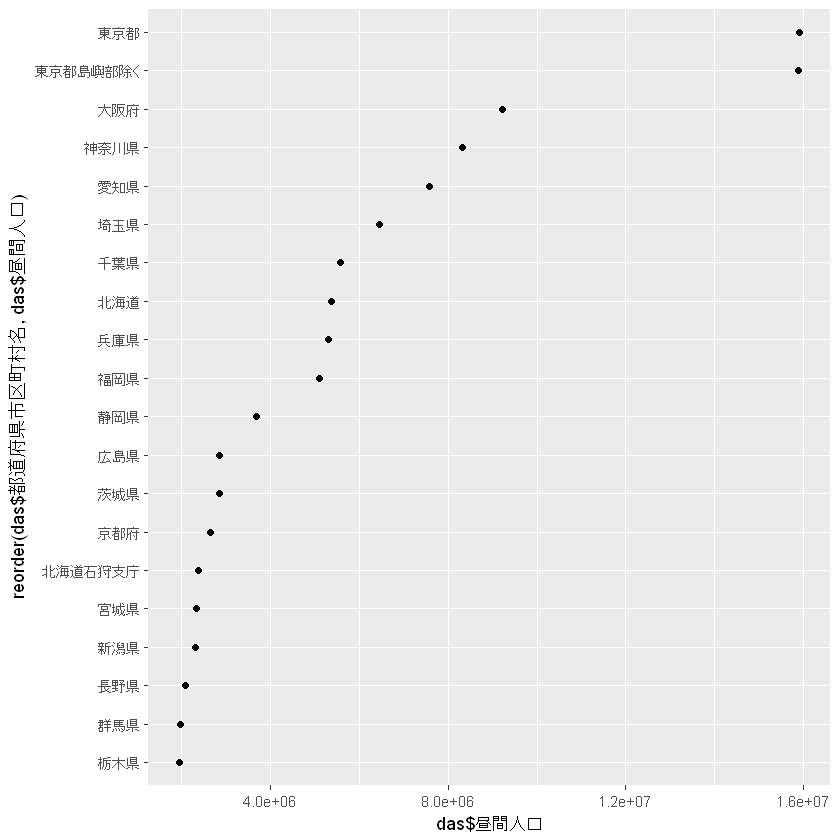

In [200]:
# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22) #,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order(da$"昼間人口", decreasing=T),]
das <- head(ds, n=20)
#das

g <- ggplot(das, aes(y = reorder(das$"都道府県市区町村名",das$"昼間人口"),x= das$"昼間人口"))
g <- g + geom_point() #aes(x=reorder(das$"都道府県市区町村名",das$"区分"),color=factor(das$"区分")))
#g <- g + facet_grid(das$"区分"~., scales = "free_y",   space = "free_y")
#g <- g + coord_flip()
plot(g)


In [251]:
nameOrder <- das$"都道府県市区町村名"[order(factor(das$"区分"),das$"昼間人口")] #, decreasing=T)] 
(nameOrder)

[1] 栃木県           群馬県           長野県           新潟県          
 [5] 宮城県           京都府           茨城県           広島県          
 [9] 静岡県           福岡県           兵庫県           北海道          
[13] 千葉県           埼玉県           愛知県           神奈川県        
[17] 大阪府           東京都           北海道石狩支庁   東京都島嶼部除く
20 Levels: 東京都島嶼部除く 北海道石狩支庁 東京都 大阪府 神奈川県 ... 栃木県

In [252]:
 das$"都道府県市区町村名" <- factor( das$"都道府県市区町村名",levels = nameOrder)
(das$"都道府県市区町村名")

[1] 東京都           東京都島嶼部除く 大阪府           神奈川県        
 [5] 愛知県           埼玉県           千葉県           北海道          
 [9] 兵庫県           福岡県           静岡県           広島県          
[13] 茨城県           京都府           北海道石狩支庁   宮城県          
[17] 新潟県           長野県           群馬県           栃木県          
20 Levels: 栃木県 群馬県 長野県 新潟県 宮城県 京都府 茨城県 広島県 ... 東京都島嶼部除く

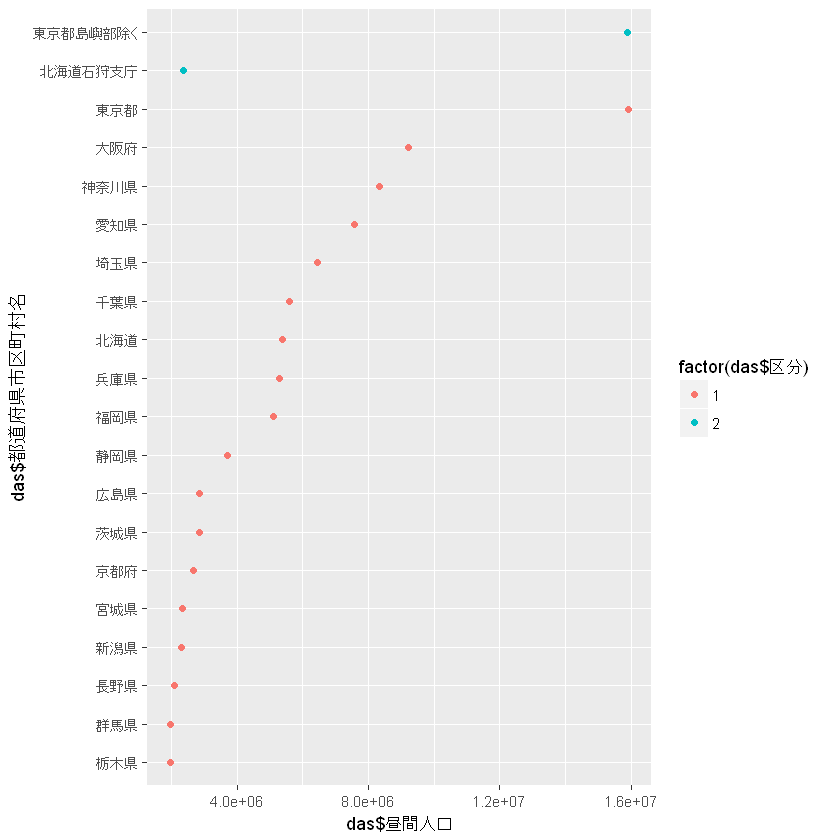

In [253]:
# ggplot2 パッケージを使用
library(ggplot2)

da <- rbind(d1,d2,d22) #,d3,d4,d5,d6)
#da <- rbind(d1)
ds <- da[order(da$"昼間人口", decreasing=T),]
das <- head(ds, n=20)
nameOrder <- das$"都道府県市区町村名"[order(factor(das$"区分"),das$"昼間人口")]# decreasing=T)] 
das$"都道府県市区町村名" <- factor( das$"都道府県市区町村名",levels = nameOrder)

g <- ggplot(das, aes(y = das$"都道府県市区町村名",x= das$"昼間人口"))
g <- g + geom_point(aes(color=factor(das$"区分"))) #x=reorder(das$"都道府県市区町村名",das$"区分"),color=factor(das$"区分")))
#g <- g + facet_grid(das$"区分"~., scales = "free_y",   space = "free_y")
#g <- g + coord_flip()
plot(g)


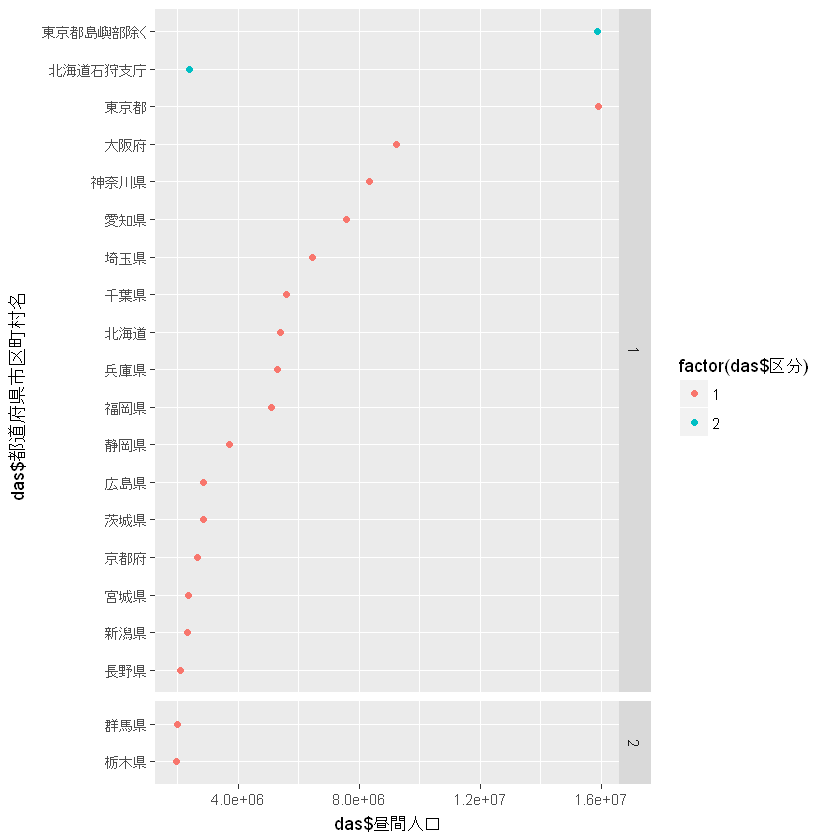

In [257]:
# ggplot2 パッケージを使用
library(ggplot2)

g <- ggplot(das, aes(y = das$"都道府県市区町村名",x= das$"昼間人口"))
g <- g + geom_point(aes(color=factor(das$"区分"))) #x=reorder(das$"都道府県市区町村名",das$"区分"),color=factor(das$"区分")))
g <- g + facet_grid(das$"区分"~., scales="free_y",   space = "free_y")
plot(g)
